# Actividad 10

In [1]:
import numpy as np
import pandas as pd
import eagleSqlTools as sql
from matplotlib import colors
import matplotlib.pyplot as plt
import merger_tree_tools as mtt
import Curves2D
import plotly.graph_objects as go
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM

In [2]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 28
pd.options.display.max_columns = 50

In [3]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 9/' 
# path_win =

In [4]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 9/'

In [5]:
plt.rcParams['text.usetex'] = True

In [6]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

### Descargamos las tablas que usamos

In [7]:
# Historia de merger de las galaxias mayores a 10**10 del snap 28
merger_2 = pd.read_csv('/home/ramiro/Facultad/Tesis/Datos/Actividad 7/Actividad_8(merger_history_solo_star_mass)_(msatar>10e8).dat')

In [8]:
DF = pd.read_csv(path_lin+'/Actividad_9_RefL0100N1504_snap_28(siz_mor_fof).dat')

df = DF[(DF['Stars_Mass']>=1e10)].copy()

df['SF_logOH']=12+np.log10(df['SF_Oxygen']/df['SF_Hydrogen'])-np.log10(16)

In [9]:
Act_5 = pd.read_csv('/home/ramiro/Facultad/Tesis/Datos/Actividad 6/Actividad_5_v2_Parte_2.dat',usecols=['GalaxyID_test','GalaxyID_V1','GalaxyID_V2'],index_col='GalaxyID_test')

Algunas GalaxyID=[19701409, 18544428, 13749519]

## Vemos la historia de mergers para elegir las galaxias que nos interezan

In [10]:
cota_superior_merger = 2 # Level of merger máximo que queremos para la historia de cada galaxia
cota_inferior_merger = 1.25 # Level of merger mínimo que queremos para la historia de cada galaxia
cota_snap=19 # Desde que snap queremos ver

In [11]:
data = {'GalaxyID_test':[],'GroupID_test':[],
        'Lm_snap1':[],'Lm_snap2':[],'Lm_snap3':[],'Lm_snap4':[],
        'Lm_snap5':[],'Lm_snap6':[],'Lm_snap7':[],'Lm_snap8':[],
        'Lm_snap9':[],'Lm_snap10':[],'Lm_snap11':[],'Lm_snap12':[],
        'Lm_snap13':[],'Lm_snap14':[],'Lm_snap15':[],'Lm_snap16':[],
        'Lm_snap17':[],'Lm_snap18':[],'Lm_snap19':[],'Lm_snap20':[],
        'Lm_snap21':[],'Lm_snap22':[],'Lm_snap23':[],'Lm_snap24':[],
        'Lm_snap25':[],'Lm_snap26':[],'Lm_snap27':[],'Lm_snap28':[]}

DATA_merge   = pd.DataFrame(data=data)
DATA_merge_2 = pd.DataFrame(data=data)

for i in np.arange(len(merger_2)):
    
    j=cota_snap
    
    for k in np.arange(cota_snap,30):
        if j==29:
            DATA_merge_2 = DATA_merge_2.append(merger_2.iloc[i])
        elif merger_2['Lm_snap'+str(j)].iloc[i]<=cota_superior_merger:
            j=j+1           
        elif merger_2['Lm_snap'+str(j)].isna().iloc[i]:
            j=j+1
        
        else:break

            
DATA_merge_2 = DATA_merge_2.astype({'GalaxyID_test':int,'GroupID_test':int,
                                'Lm_snap1':float, 'Lm_snap2':float, 'Lm_snap3':float, 'Lm_snap4':float,
                                'Lm_snap5':float, 'Lm_snap6':float, 'Lm_snap7':float, 'Lm_snap8':float,
                                'Lm_snap9':float, 'Lm_snap10':float,'Lm_snap11':float,'Lm_snap12':float,
                                'Lm_snap13':float,'Lm_snap14':float,'Lm_snap15':float,'Lm_snap16':float,
                                'Lm_snap17':float,'Lm_snap18':float,'Lm_snap19':float,'Lm_snap20':float,
                                'Lm_snap21':float,'Lm_snap22':float,'Lm_snap23':float,'Lm_snap24':float,
                                'Lm_snap25':float,'Lm_snap26':float,'Lm_snap27':float,'Lm_snap28':float})
            
            
            
for i in np.arange(len(DATA_merge_2)):
    
    j=cota_snap
    
    for k in np.arange(cota_snap,30):
        if j==29:
            break
        
        elif DATA_merge_2['Lm_snap'+str(j)].iloc[i]>=cota_inferior_merger:
            DATA_merge = DATA_merge.append(DATA_merge_2.iloc[i])
            break
        
        elif DATA_merge_2['Lm_snap'+str(j)].isna().iloc[i]:
            j=j+1
            
        else:j=j+1

DATA_merge = DATA_merge.astype({'GalaxyID_test':int,'GroupID_test':int,
                                'Lm_snap1':float, 'Lm_snap2':float, 'Lm_snap3':float, 'Lm_snap4':float,
                                'Lm_snap5':float, 'Lm_snap6':float, 'Lm_snap7':float, 'Lm_snap8':float,
                                'Lm_snap9':float, 'Lm_snap10':float,'Lm_snap11':float,'Lm_snap12':float,
                                'Lm_snap13':float,'Lm_snap14':float,'Lm_snap15':float,'Lm_snap16':float,
                                'Lm_snap17':float,'Lm_snap18':float,'Lm_snap19':float,'Lm_snap20':float,
                                'Lm_snap21':float,'Lm_snap22':float,'Lm_snap23':float,'Lm_snap24':float,
                                'Lm_snap25':float,'Lm_snap26':float,'Lm_snap27':float,'Lm_snap28':float})

merger = DATA_merge
del DATA_merge

In [12]:
merger

,GalaxyID_test,GroupID_test,Lm_snap1,Lm_snap2,Lm_snap3,Lm_snap4,Lm_snap5,Lm_snap6,Lm_snap7,Lm_snap8,Lm_snap9,Lm_snap10,Lm_snap11,Lm_snap12,Lm_snap13,Lm_snap14,Lm_snap15,Lm_snap16,Lm_snap17,Lm_snap18,Lm_snap19,Lm_snap20,Lm_snap21,Lm_snap22,Lm_snap23,Lm_snap24,Lm_snap25,Lm_snap26,Lm_snap27,Lm_snap28
0,9498012,28000000000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.0,1.330734,1.0,1.0,1.0,1.0,1.237301,1.000000,1.000000,1.34205,1.000000,1.000000,1.0,1.0,1.0,1.000000
2,9512113,28000000000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.514477,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.566030,1.0,1.0,1.0,1.000000
6,2721236,28000000000002,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.581914,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,1.0,1.000000
24,10352660,28000000002189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.000000,1.374371,1.00000,1.000000,1.000000,1.0,1.0,1.0,1.000000
38,12174564,28000000000029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.325419,1.000000,1.00000,1.000000,1.000000,1.0,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,8823157,28000000001085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.367529,1.0,1.0,1.0,1.000000
3606,8849003,28000000001106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.334562,1.000000,1.0,1.0,1.0,1.000000
3627,10060829,28000000001893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.442412,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,1.0,1.000000
3628,10098636,28000000001930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,1.0,1.695974


In [13]:
# Aplicamos la mascara según el level of merger que queremos
# merger['GalaxyID_test'][merger['Lm_snap15']>=10].sample(3)

In [14]:
# ID de la galaxia a la cual aremos el analisis
a = 9512113

## Ubicación de la galaxia en el plano masa distintas variables

In [15]:
ID = [a]

mask_IDa = (df['GalaxyID'] == ID[0] )

Mass_a   = df['Stars_Mass'][mask_IDa]

mask_OH  = (df['SF_logOH']>0)

MASS     = [Mass_a.iloc[0]]

print(Mass_a)

1751    1.345128e+11
Name: Stars_Mass, dtype: float64


In [16]:
# Magnitudes a las cuales les vamos a calcular la mediana y lso percentiles
xvar = [
        np.log10(df['Stars_Mass'])[mask_OH].values,
       ]

yvar =  [
        np.log10(df['Stars_Mass'])[mask_OH].values,
        np.log10(df['BlackHoleMass'])[mask_OH].values,
        np.log10(df['Stars_Mass']+df['SF_Mass'])[mask_OH].values,
        np.log10(df['Stars_Metallicity']/0.02)[mask_OH].values,
        df['SF_logOH'][mask_OH].values,
        (df['SF_Mass']/(df['Stars_Mass']+df['SF_Mass']))[mask_OH].values, 
        np.log10(df['StarFormationRate'])[mask_OH].values,
        np.log10(df['StarFormationRate']/df['Stars_Mass'])[mask_OH].values,
        df['R_halfmass30'][mask_OH].values,
        df['KappaCoRot'][mask_OH].values,
        np.log10((df['BlackHoleMass']/df['Stars_Mass']))[mask_OH].values,
        np.log10(df['Group_M_Crit200'])[mask_OH].values
        ]

xID = [
       np.log10(df['Stars_Mass'])[mask_IDa].values,
      ]

yID = [
       np.log10(df['Stars_Mass'])[mask_IDa].values,
       np.log10(df['BlackHoleMass'])[mask_IDa].values,
       np.log10(df['Stars_Mass']+df['SF_Mass'])[mask_IDa].values,
       np.log10(df['Stars_Metallicity']/0.02)[mask_IDa].values,
       df['SF_logOH'][mask_IDa].values,
       (df['SF_Mass']/(df['Stars_Mass']+df['SF_Mass']))[mask_IDa].values, 
       np.log10(df['StarFormationRate'])[mask_IDa].values,
       np.log10(df['StarFormationRate']/df['Stars_Mass'])[mask_IDa].values,
       df['R_halfmass30'][mask_IDa].values,
       df['KappaCoRot'][mask_IDa].values,
       np.log10((df['BlackHoleMass']/df['Stars_Mass']))[mask_IDa].values,
       np.log10(df['Group_M_Crit200'])[mask_IDa].values
       ]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10      # Mínima cantidad de elementos para considerar en un bin

yvar_medians=[]
yvar_errors=[]

for j in np.arange(len(yvar)):
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                 perc_low=perc_low,perc_high=perc_high)
    yvar_medians.append(ymedian)
    yvar_errors.append(yerror)


# Agrego nan el la última columna porque corresponde a level of merger
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))
# Y también para Subgruopnumber
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))
# Y también para distancia la centro de FOF
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))

In [18]:
xlabels=[r'$Log(M_{Star})[M_{Sun}]$']

ylabels=[
         r'$Log(M_{Star})[M_{Sun}]$'
        ,r'$Log(BlackHoleMass)$'
        ,r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
        ,r'$Log(Z_{Star}/Z_{Sun})$'
        ,r'$12+Log(O/H)$'
        ,r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
        ,r'$Log(SFR)[unidad]$'
        ,r'$Log(sSFR)[unidad]$'
        ,r'$R_{HM30}[pkpc]$'
        ,r'$KappaCoRot$'
        ,r'$Log(BlackHoleMass/M_{Star})$'
        ,r'$Log(M_{200})[M_{Sun}]$'
        ]

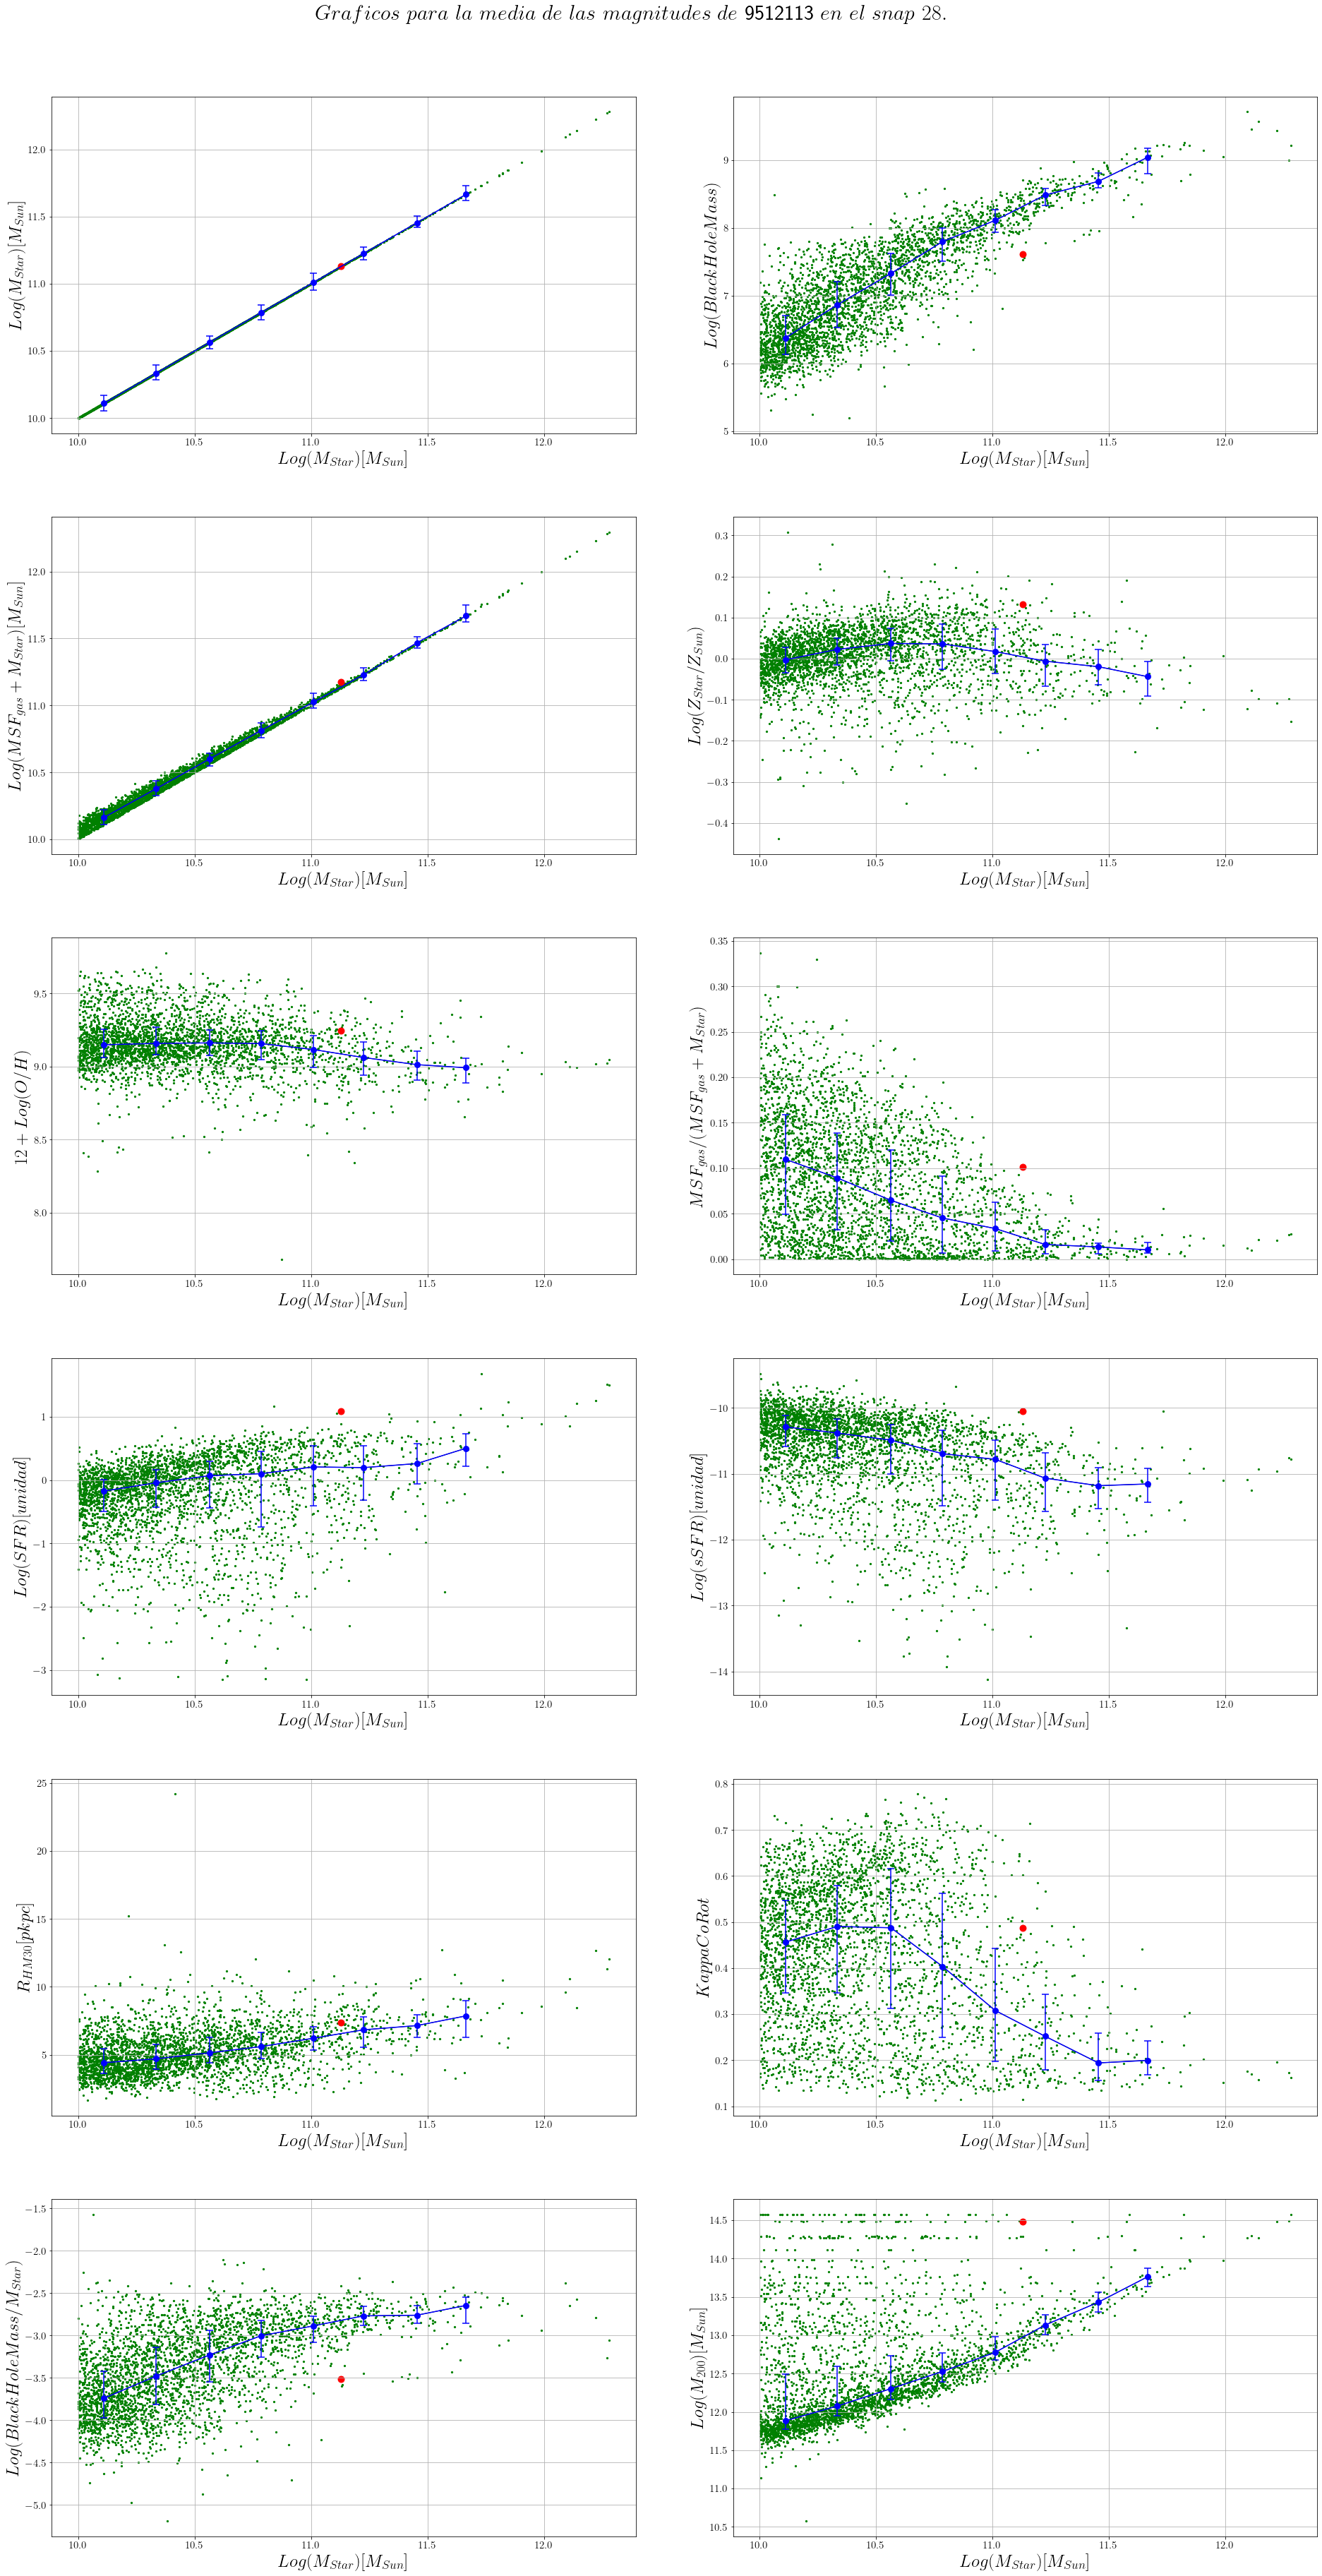

In [19]:
fig,ax = plt.subplots(6,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=12.0)

fontdict ={'fontsize': 30}

fig.suptitle(r'$Graficos\ para\ la\ media\ de\ las\ magnitudes\ de\ $'+str(a)+'$\ en\ el\ snap\ 28.$', fontsize=30)

for i in np.arange(len(ylabels)):

#     xlim=(min(xvar[i]),max(xvar[i]))
    ylim=(min(yvar[i])-0.05*abs(min(yvar[i])),max(yvar[i])+0.05*abs(max(yvar[i])))

    ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
    ax[i].set_ylabel(str(ylabels[i]),fontsize=25)

#     ax[i].set_xlim(min(xvar_main[i].values),max(xvar_main[i].values))
#     ax[i].set_xlim(xlim)
#     ax[i].set_ylim(ylim)

    ax[i].tick_params(axis='both', which='major', labelsize=15)
                
    plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)
     

#    # scatter plot
      #Para el tree
#     ax[i].scatter(xvar_tree[i],yvar_tree[i],marker='o',s=2,c='0.3',label='Scatter plot')

    # Para la rama principal
    ax[i].plot(xmedian,yvar_medians[i],linestyle='-',c='k',lw=1)
    ax[i].scatter(xvar[0],yvar[i],marker='o',s=5,c='g',linestyle='-',label='Scatter plot')
    
    ax[i].scatter(xID[0],yID[i],marker='o',s=80,c='r')

    
    # Curva mediana con barras de error y marcadores

    ax[i].errorbar(xmedian,yvar_medians[i],yerr=yvar_errors[i],c='b',marker='o',markersize=8,linestyle='-',
                                                 linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
  
    ax[i].grid()

# plt.savefig(path_lin_fig+'figura_version1.png')

plt.show()

## Calculamos las medias en el bin en el que se encuentran las galaxias

In [20]:
# Elegimos el intervalo de masas en el cual se va a tomar la mediana
mask_mass = (df['Stars_Mass'] >= (min(MASS)-min(MASS)*0.34))&(df['Stars_Mass']<= (max(MASS)+max(MASS)*0.34)) & (df['SF_logOH'].notna())

In [21]:
# Magnitudes a las cuales les vamos a calcular la mediana y lso percentiles
xvar = [
        np.log10(df['Stars_Mass'])[mask_mass].values,
       ]

yvar =  [
        np.log10(df['Stars_Mass'])[mask_mass].values,
        np.log10(df['BlackHoleMass'])[mask_mass].values,
        np.log10(df['Stars_Mass']+df['SF_Mass'])[mask_mass].values,
        np.log10(df['Stars_Metallicity']/0.02)[mask_mass].values,
        df['SF_logOH'][mask_mass].values,
        (df['SF_Mass']/(df['Stars_Mass']+df['SF_Mass']))[mask_mass].values, 
        np.log10(df['StarFormationRate'])[mask_mass].values,
        np.log10(df['StarFormationRate']/df['Stars_Mass'])[mask_mass].values,
        df['R_halfmass30'][mask_mass].values,
        df['KappaCoRot'][mask_mass].values,
        np.log10((df['BlackHoleMass']/df['Stars_Mass']))[mask_mass].values,
        np.log10(df['Group_M_Crit200'])[mask_mass].values
        ]

xID = [
       np.log10(df['Stars_Mass'])[mask_IDa].values,
      ]

yID = [
       np.log10(df['Stars_Mass'])[mask_IDa].values,
       np.log10(df['BlackHoleMass'])[mask_IDa].values,
       np.log10(df['Stars_Mass']+df['SF_Mass'])[mask_IDa].values,
       np.log10(df['Stars_Metallicity']/0.02)[mask_IDa].values,
       df['SF_logOH'][mask_IDa].values,
       (df['SF_Mass']/(df['Stars_Mass']+df['SF_Mass']))[mask_IDa].values, 
       np.log10(df['StarFormationRate'])[mask_IDa].values,
       np.log10(df['StarFormationRate']/df['Stars_Mass'])[mask_IDa].values,
       df['R_halfmass30'][mask_IDa].values,
       df['KappaCoRot'][mask_IDa].values,
       np.log10((df['BlackHoleMass']/df['Stars_Mass']))[mask_IDa].values,
       np.log10(df['Group_M_Crit200'])[mask_IDa].values
       ]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Calculamos las medias de las variables en el snap 28, para luego colocarlas como barras horizontales en los gráficos

In [22]:
nbins=1        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10      # Mínima cantidad de elementos para considerar en un bin

yvar_medians=[]
yvar_errors=[]

for j in np.arange(len(yvar)):
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                 perc_low=perc_low,perc_high=perc_high)
    yvar_medians.append(ymedian)
    yvar_errors.append(yerror)


# Agrego nan el la última columna porque corresponde a level of merger
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))
# Y también para Subgruopnumber
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))
# Y también para distancia la centro de FOF
yvar_medians.append(np.array([np.nan]))
yvar_errors.append(np.array([np.nan,np.nan]))

In [23]:
xlabels=[r'$Log(M_{Star})[M_{Sun}]$']

ylabels=[
         r'$Log(M_{Star})[M_{Sun}]$'
        ,r'$Log(BlackHoleMass)$'
        ,r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
        ,r'$Log(Z_{Star}/Z_{Sun})$'
        ,r'$12+Log(O/H)$'
        ,r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
        ,r'$Log(SFR)[unidad]$'
        ,r'$Log(sSFR)[unidad]$'
        ,r'$R_{HM30}[pkpc]$'
        ,r'$KappaCoRot$'
        ,r'$Log(BlackHoleMass/M_{Star})$'
        ,r'$Log(M_{200})[M_{Sun}]$'
        ]

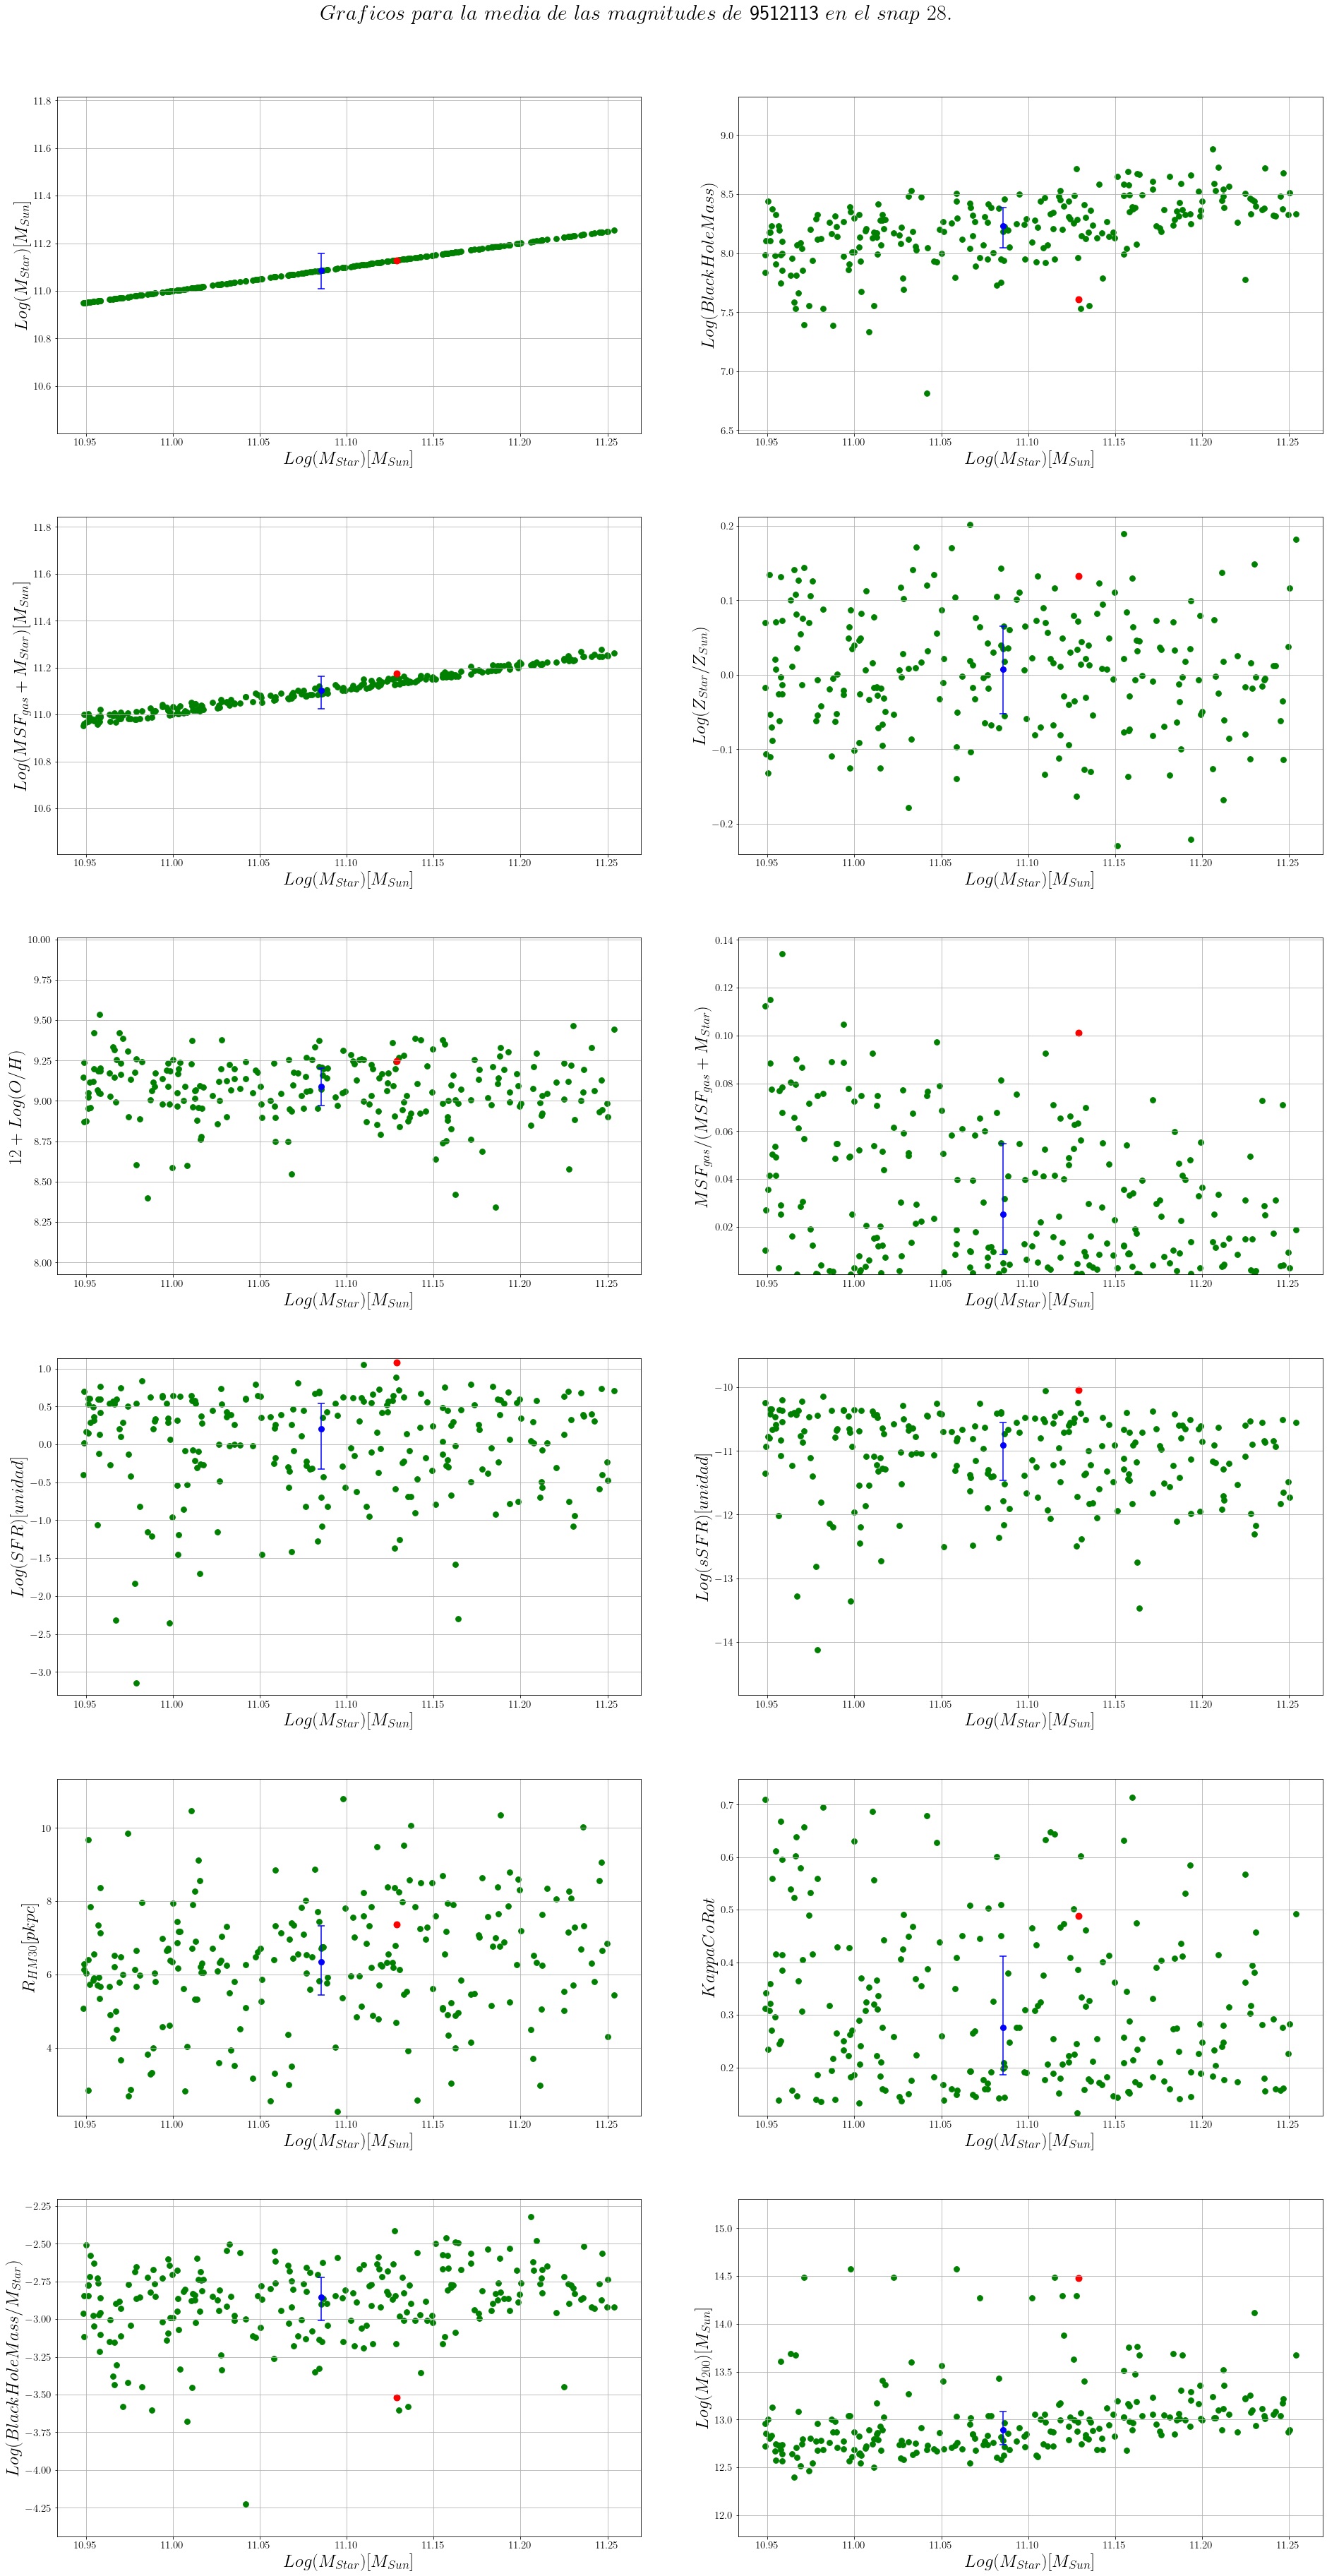

In [24]:
fig,ax = plt.subplots(6,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=12.0)

fontdict ={'fontsize': 30}

fig.suptitle(r'$Graficos\ para\ la\ media\ de\ las\ magnitudes\ de\ $'+str(a)+'$\ en\ el\ snap\ 28.$', fontsize=30)

for i in np.arange(len(ylabels)):

#     xlim=(min(xvar[i]),max(xvar[i]))
    ylim=(min(yvar[i])-0.05*abs(min(yvar[i])),max(yvar[i])+0.05*abs(max(yvar[i])))

    ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
    ax[i].set_ylabel(str(ylabels[i]),fontsize=25)

#     ax[i].set_xlim(min(xvar_main[i].values),max(xvar_main[i].values))
#     ax[i].set_xlim(xlim)
    ax[i].set_ylim(ylim)

    ax[i].tick_params(axis='both', which='major', labelsize=15)
                
    plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)
     

#    # scatter plot
      #Para el tree
#     ax[i].scatter(xvar_tree[i],yvar_tree[i],marker='o',s=2,c='0.3',label='Scatter plot')

    # Para la rama principal
    ax[i].plot(xmedian,yvar_medians[i],linestyle='-',c='k',lw=1)
    ax[i].scatter(xvar[0],yvar[i],marker='o',s=60,c='g',linestyle='-',label='Scatter plot')
    
    ax[i].scatter(xID[0],yID[i],marker='o',s=80,c='r')

    
    # Curva mediana con barras de error y marcadores

    ax[i].errorbar(xmedian,yvar_medians[i],yerr=yvar_errors[i],c='b',marker='o',markersize=8,linestyle='-',
                                                 linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
  
    ax[i].grid()

# plt.savefig(path_lin_fig+'figura_version1.png')

plt.show()

## Descarga de datos:

In [25]:
CATALOGOS=['Subhalo','Sizes','MorphoKinem']

ALIAS=['sub','siz','mor']

COLUMNAS=[
           [
            'GalaxyID','GroupID','SubGroupNumber','LastProgID','TopLeafID','DescendantID',
            'SnapNum','Stars_Mass','SF_Hydrogen','SF_Oxygen','Redshift',
            'StarFormationRate','Stars_Metallicity','SF_Mass','BlackHoleMass','MassType_DM',
            'SF_Metallicity','Vmax','CentreOfPotential_x','CentreOfPotential_y','CentreOfPotential_z','HalfMassRad_Star'
           ],
           [
            'GalaxyID','R_halfmass30','R_halfmass100'
           ],
           [
            'GalaxyID', 'KappaCoRot'
           ]
    
          ]

# Lista con las diferentes catálogos 
DATAFRAMES=[]

# Simulación a usar y datos de galaxia deseada
simu='RefL0100N1504'

snap=28
galid=a

# Usuario y contraseña para conectarse a EAGLE DataBase
usr='cht015'
pwd='BH457tfj'

# Descargar todos los IDS necesarios de la galaxia deseada

myIDs=mtt.retrieve_ids(usr,pwd,simu,snap,galid)

for j in np.arange(len(CATALOGOS)):
    # Descargar merger tree completo de la galaxia deseada
    # Nombre y alias de la tabla de la cual se quieren descargar datos
    table=CATALOGOS[j]
    table_alias=ALIAS[j]

    # Variables que se quiere descargar. OJO!! Asegurarse que estas variables
    # estén en la tabla deseada.
    columns=COLUMNAS[j]

    tree=mtt.download_merger_tree(usr,pwd,simu,myIDs['GalaxyID'],myIDs['LastProgID'],
                                      table=table,table_alias=table_alias,columns=columns)

    # NOTA: si ya se tiene descargados en un archivo todas las galaxias de la simu, se puede
    #       saltear esta celda, y en su lugar, leer dicho archivo de datos y usar máscaras
    #       para seleccionar las galaxias del árbol deseado
    
   # Aplicar condiciones a las galaxias del árbol, si es necesario


    # Armar arbol sólo con galaxias seleccionadas según condiciones anteriores

    if ALIAS[j]=='sub':
        # Agregar variables al árbol final, si es necesario
        tree['sSFR']=tree['StarFormationRate']/tree['Stars_Mass']
        tree['SF_logOH']=12+np.log10(tree['SF_Oxygen']/tree['SF_Hydrogen'])-np.log10(16)

    DATAFRAMES.append(pd.DataFrame(tree))
    
Sub_tree_a=DATAFRAMES[0]
Siz_tree_a=DATAFRAMES[1]
Mor_tree_a=DATAFRAMES[2]

# Borro algunas variables
del DATAFRAMES

<ipython-input-25-5bdbb6176695>:62: RuntimeWarning: divide by zero encountered in true_divide
  tree['sSFR']=tree['StarFormationRate']/tree['Stars_Mass']
<ipython-input-25-5bdbb6176695>:62: RuntimeWarning: invalid value encountered in true_divide
  tree['sSFR']=tree['StarFormationRate']/tree['Stars_Mass']
<ipython-input-25-5bdbb6176695>:63: RuntimeWarning: invalid value encountered in true_divide
  tree['SF_logOH']=12+np.log10(tree['SF_Oxygen']/tree['SF_Hydrogen'])-np.log10(16)
<ipython-input-25-5bdbb6176695>:63: RuntimeWarning: divide by zero encountered in log10
  tree['SF_logOH']=12+np.log10(tree['SF_Oxygen']/tree['SF_Hydrogen'])-np.log10(16)


## Armamos las ramas principales

In [26]:
# Seleccionamos la histora particular de las fusiones para las galaxias seleccionadas 
mask_a = (merger['GalaxyID_test'] == a)
merger_a = merger[mask_a].drop(labels=['GalaxyID_test','GroupID_test'],axis=1).copy()

# RedShift correspondiente a los sanps 1 a 28
redshift = [15.13, 9.99, 8.99, 8.07, 7.05, 5.97, 5.49, 5.04, 4.49, 3.98,
             3.53, 3.02, 2.48, 2.24, 2.01, 1.74, 1.49, 1.26, 1.00, 0.87,
             0.74, 0.62, 0.50, 0.37, 0.27, 0.18, 0.10, 0.00]

REDSHIFT = ['15.13', '9.99', '8.99', '8.07', '7.05', '5.97', '5.49', '5.04', '4.49', '3.98',
             '3.53', '3.02', '2.48', '2.24', '2.01', '1.74', '1.49', '1.26', '1.00', '0.87',
             '0.74', '0.62', '0.50', '0.37', '0.27', '0.18', '0.10', '0.00']

tiempo = cosmo.age(redshift).value

# Tiramos las columnas que estén repetidas
Sub_tree_a.drop(labels=['SubHaloGalaxyID'],axis=1,inplace=True)

# Agregamos una columna temporal
Sub_tree_a['tiempo'] = cosmo.age(Sub_tree_a['Redshift']).value

# Unimos las diferentes tablas de los catálogos que tengamos

Sub_Mor_tree_a = pd.merge(right=Mor_tree_a,left=Sub_tree_a,right_on='GalaxyID',left_on='GalaxyID')
Sub_Siz_tree_a = pd.merge(right=Siz_tree_a,left=Sub_tree_a,right_on='GalaxyID',left_on='GalaxyID')

# Ordenamos de manera decreciente según el redshift

Sub_tree_a.sort_values(by=['Redshift'],ascending=False,inplace=True)
Sub_Mor_tree_a.sort_values(by=['Redshift'],ascending=False,inplace=True)
Sub_Siz_tree_a.sort_values(by=['Redshift'],ascending=False,inplace=True)

# Creamos la Main Branch de cada una de las galaxias, para eso armamos un dict con myIDs

myIDs_a = {'GalaxyID': Sub_tree_a['GalaxyID'].iloc[-1],'TopLeafID': Sub_tree_a['TopLeafID'].iloc[-1],
           'LastProgID': Sub_tree_a['LastProgID'].iloc[-1],'DescendantID': Sub_tree_a['DescendantID'].iloc[-1]} 


# Armo un diccionario con solo la main branch del árbol

Main_Sub_a     = {}
Main_Sub_Mor_a = {}
Main_Sub_Siz_a = {}


# Mascaras para las galaxias y los diferentes catálogos

# Para la galxia a
mask_main_sub_a     = np.logical_and(Sub_tree_a['GalaxyID']>=myIDs_a['GalaxyID'],
                                     Sub_tree_a['GalaxyID']<=myIDs_a['TopLeafID'])

mask_main_sub_mor_a = np.logical_and(Sub_Mor_tree_a['GalaxyID']>=myIDs_a['GalaxyID'],
                                     Sub_Mor_tree_a['GalaxyID']<=myIDs_a['TopLeafID'])

mask_main_sub_siz_a = np.logical_and(Sub_Siz_tree_a['GalaxyID']>=myIDs_a['GalaxyID'],
                                     Sub_Siz_tree_a['GalaxyID']<=myIDs_a['TopLeafID'])

# Creamos la main brunch

# Para la galaxia a
for key in Sub_tree_a.keys():
    Main_Sub_a[key] = Sub_tree_a[key][mask_main_sub_a]
    
for key in Sub_Mor_tree_a.keys():
    Main_Sub_Mor_a[key] = Sub_Mor_tree_a[key][mask_main_sub_mor_a]
    
for key in Sub_Siz_tree_a.keys():
    Main_Sub_Siz_a[key] = Sub_Siz_tree_a[key][mask_main_sub_siz_a]



# Dataframe de los catálogos para las galaxias elegidas, main brunch.
Main_Sub_a     = pd.DataFrame(Main_Sub_a)
Main_Sub_Mor_a = pd.DataFrame(Main_Sub_Mor_a)
Main_Sub_Siz_a = pd.DataFrame(Main_Sub_Siz_a)

# Listas de los catálogos para las galaxias elegidas, trees.
SUB_TREE     = [Sub_tree_a]
SUB_SIZ_TREE = [Sub_Siz_tree_a]
SUB_MOR_TREE = [Sub_Mor_tree_a]

# Listas de los catálogos para las galaxias elegidas, trees.
SUB_MAIN     = [Main_Sub_a]
SUB_SIZ_MAIN = [Main_Sub_Siz_a]
SUB_MOR_MAIN = [Main_Sub_Mor_a]

# Borro algunas variables

del Sub_tree_a, Sub_Siz_tree_a, Sub_Mor_tree_a, Main_Sub_a, Main_Sub_Siz_a, Main_Sub_Mor_a

## Descargo la historia de FOF de la galaxia seleccionada

In [27]:
# Tabla y Alias de la tabla desde donde quiero descargar datos
table='FOF'
table_alias='fof'  

# Columnas a seleccionar (agregar/quitar según sea necesario)
columns=[
         'GroupID','SnapNum','GroupCentreOfPotential_x','GroupCentreOfPotential_y','GroupCentreOfPotential_z'
        ,'Group_M_Crit200','Group_R_Crit200','NumOfSubhalos'
        ]


# De qué tabla seleccionar ('FROM' en la query SQL)
from_table=simu+'_'+table+' as '+table_alias

DATA_FOF = pd.DataFrame()

for i in np.arange(len(SUB_MAIN[0]['GroupID'])):
    # Simulación y snapnum deseado
    snap = SUB_MAIN[0]['SnapNum'][i]
    GID  = SUB_MAIN[0]['GroupID'][i]
   # Condiciones para seleccionar ('WHERE' en la query SQL)
   # NO AGREGAR ACÁ EL ALIAS DE LA TABLA! Se agragará después
    where_cond=[
            'SnapNum='+str(snap),
            'GroupID='+str(GID)
              ]

    #---------------------------------------------------------------------------

    # Armo la sentencia 'SELECT' a partir de la lista de columnas
    select=','.join([table_alias+'.'+col for col in columns])

    # Armo la sentencia 'WHERE' a paritr de la lista de condiciones
    where=' and '.join(where_cond)

    #### Conexión a la base de datos y descarga

    # Conectarse a la base de datos
    con = sql.connect(usr,password=pwd)

    # Query en SQL
    query = 'SELECT '+select+' FROM '+from_table+' WHERE '+where

    # Execute query 
    exquery = sql.execute_query(con, query)

    # List of column names of downloaded data
#     colnames=(exquery.view(np.recarray).dtype.names)
    colnames = (exquery.view(np.recarray).dtype.names)

    # Dictionary of data
    mytable={}
    for name in colnames:
        mytable[name]=exquery[name]
        
    # Nuevo diccionario para poder pasarlo a dataframe, seguro que se puede hacer mejor
    newtable={}
    for name in colnames:
        newtable[name]=float(mytable[name])
    
#     data_ascii=Table(mytable)
    if i==0:
        DATA_FOF = pd.DataFrame(data=newtable,index=[0])
    else:DATA_FOF = DATA_FOF.append(newtable,ignore_index=True)

# DATA_FOF = pd.DataFrame(data=newtable,index=[0])
DATA_FOF = DATA_FOF.astype({'GroupID':int,'SnapNum':int,'GroupCentreOfPotential_x':float, 'GroupCentreOfPotential_y':float
                            ,'GroupCentreOfPotential_z':float, 'Group_M_Crit200':float,
                            'Group_R_Crit200':float, 'Group_R_Crit200':float, 'NumOfSubhalos':int})

    # dictionary={key1:value,key2:value,....}

DATA_FOF.drop(columns=['SnapNum'], inplace=True)
Main_Sub_Fof_a = pd.merge(right=DATA_FOF,left=SUB_MAIN[0],right_on='GroupID',left_on='GroupID')
Main_Sub_Fof_a['tiempo'] = cosmo.age(Main_Sub_Fof_a['Redshift']).value
SUB_FOF_MAIN = [Main_Sub_Fof_a]

# Borro algunas variables
del Main_Sub_Fof_a

## Descargo las main branch de los dos primeros vecinos en el snap 28

In [28]:
CATALOGOS=['Subhalo']

ALIAS=['sub']

COLUMNAS=[
           [
            'GalaxyID','SnapNum','LastProgID','TopLeafID','DescendantID','CentreOfPotential_x','CentreOfPotential_y','CentreOfPotential_z','HalfMassRad_Star'
           ]
    
          ]

# Lista con las diferentes catálogos 
DF_VECINOS=[]

# Simulación a usar y datos de galaxia deseada
simu='RefL0100N1504'

snap=28

galid=Act_5.loc[a].values

# Usuario y contraseña para conectarse a EAGLE DataBase
usr='cht015'
pwd='BH457tfj'

# Descargar todos los IDS necesarios de la galaxia deseada
for i in np.arange(len(Act_5.loc[a].values)):
    myIDs=mtt.retrieve_ids(usr,pwd,simu,snap,galid[i])

    for j in np.arange(len(CATALOGOS)):
        # Descargar merger tree completo de la galaxia deseada
        # Nombre y alias de la tabla de la cual se quieren descargar datos
        table=CATALOGOS[j]
        table_alias=ALIAS[j]

        # Variables que se quiere descargar. OJO!! Asegurarse que estas variables
        # estén en la tabla deseada.
        columns=COLUMNAS[j]

        tree=mtt.download_merger_tree(usr,pwd,simu,myIDs['GalaxyID'],myIDs['LastProgID'],
                                      table=table,table_alias=table_alias,columns=columns)

        DF_VECINOS.append(pd.DataFrame(tree))
    
Sub_tree_V1 = DF_VECINOS[0].sort_values(by=['SnapNum'],ascending=True)
Sub_tree_V2 = DF_VECINOS[1].sort_values(by=['SnapNum'],ascending=True)


# ID de los vecinos
myIDs_V1 = {'GalaxyID': Sub_tree_V1['GalaxyID'].iloc[-1],'TopLeafID': Sub_tree_V1['TopLeafID'].iloc[-1],
            'LastProgID': Sub_tree_V1['LastProgID'].iloc[-1],'DescendantID': Sub_tree_V1['DescendantID'].iloc[-1]}

myIDs_V2 = {'GalaxyID': Sub_tree_V2['GalaxyID'].iloc[-1],'TopLeafID': Sub_tree_V2['TopLeafID'].iloc[-1],
            'LastProgID': Sub_tree_V2['LastProgID'].iloc[-1],'DescendantID': Sub_tree_V2['DescendantID'].iloc[-1]} 


# Armo un diccionario con solo la main branch del árbol

Main_Sub_V1 = {}
Main_Sub_V2 = {}

# Mascaras para las vecinas

mask_main_sub_V1 = np.logical_and(Sub_tree_V1['GalaxyID']>=myIDs_V1['GalaxyID'],
                                      Sub_tree_V1['GalaxyID']<=myIDs_V1['TopLeafID'])

mask_main_sub_V2 = np.logical_and(Sub_tree_V2['GalaxyID']>=myIDs_V2['GalaxyID'],
                                     Sub_tree_V2['GalaxyID']<=myIDs_V2['TopLeafID'])

# Creamos la main brunch

# Para la galaxia a
for key in Sub_tree_V1.keys():
    Main_Sub_V1[key] = Sub_tree_V1[key][mask_main_sub_V1]
    
for key in Sub_tree_V2.keys():
    Main_Sub_V2[key] = Sub_tree_V2[key][mask_main_sub_V2]

# Dataframe de los catálogos para las galaxias elegidas, main brunch.
Main_Sub_V1  = pd.DataFrame(Main_Sub_V1)
Main_Sub_V2  = pd.DataFrame(Main_Sub_V2)

# Listas de los catálogos para las galaxias elegidas, trees.
SUB_TREE_V1_V2  = [Sub_tree_V1,Sub_tree_V2]

# Listas de los catálogos para las galaxias elegidas, Main.
SUB_MAIN_V1_V2  = [Main_Sub_V1,Main_Sub_V2]

# Borro algunas variables
del Sub_tree_V1, Sub_tree_V2, Main_Sub_V1, Main_Sub_V2

## Segunda parte:
## Graficamos diferentes magnitudes en función del tiempo

In [29]:
# Variables que vamos a graficar, tanto para la galaxia a

Temporal = 'SnapNum' #Redshift o SnapNum

mask_fig = (SUB_MAIN[0]['Stars_Mass'] >1e9)

xvar_tree = [
             SUB_TREE[0]['tiempo']#r'$Log(M_{Star})[M_{Sun}]$'
            ,SUB_TREE[0]['tiempo']#r'$Log(BlackHoleMass)$'
            ,SUB_TREE[0]['tiempo']#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
            ,SUB_TREE[0]['tiempo']#r'$Log(Z_{Star}/Z_{Sun})$'
            ,SUB_TREE[0]['tiempo']#r'$12+Log(O/H)$'
            ,SUB_TREE[0]['tiempo']#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
            ,SUB_TREE[0]['tiempo']#r'$Log(SFR)[unidad]$'
            ,SUB_TREE[0]['tiempo']#r'$Log(sSFR)[unidad]$
            ,SUB_SIZ_TREE[0]['tiempo']#r'$R_{HM30}[pkpc]$'
            ,SUB_MOR_TREE[0]['tiempo']#r'$KappaCoRot$'
            ,SUB_TREE[0]['tiempo']#r'$Log(BlackHoleMass/M_{Star})$'
            ,pd.Series([np.nan])#r'$Log(M_{200})[M_{Sun}]$'
            ,pd.Series([np.nan])#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
            ,SUB_TREE[0]['tiempo']#r'$SubGroupNumber$'
            ,pd.Series(tiempo)#r'$L_{Merger}$'
            ]

xvar_tree_sup = [
             SUB_TREE[0][Temporal]#r'$Log(M_{Star})[M_{Sun}]$'
            ,SUB_TREE[0][Temporal]#r'$Log(BlackHoleMass)$'
            ,SUB_TREE[0][Temporal]#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
            ,SUB_TREE[0][Temporal]#r'$Log(Z_{Star}/Z_{Sun})$'
            ,SUB_TREE[0][Temporal]#r'$12+Log(O/H)$'
            ,SUB_TREE[0][Temporal]#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
            ,SUB_TREE[0][Temporal]#r'$Log(SFR)[unidad]$'
            ,SUB_TREE[0][Temporal]#r'$Log(sSFR)[unidad]$
            ,SUB_SIZ_TREE[0][Temporal]#r'$R_{HM30}[pkpc]$'
            ,SUB_MOR_TREE[0][Temporal]#r'$KappaCoRot$'
            ,SUB_TREE[0][Temporal]#r'$Log(BlackHoleMass/M_{Star})$'
            ,pd.Series([np.nan])#r'$Log(M_{200})[M_{Sun}]$'
            ,pd.Series([np.nan])#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
            ,SUB_TREE[0][Temporal]#r'$SubGroupNumber$'
            ,pd.Series(redshift)#r'$L_{Merger}$'
            ]

yvar_tree = [
             np.log10(SUB_TREE[0]['Stars_Mass'])#r'$Log(M_{Star})[M_{Sun}]$'
            ,np.log10(SUB_TREE[0]['BlackHoleMass'])#r'$Log(BlackHoleMass)$'
            ,np.log10(SUB_TREE[0]['Stars_Mass']+SUB_TREE[0]['SF_Mass'])#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
            ,np.log10(SUB_TREE[0]['Stars_Metallicity']/0.02)#r'$Log(Z_{Star}/Z_{Sun})$'
            ,SUB_TREE[0]['SF_logOH']#r'$12+Log(O/H)$'
            ,SUB_TREE[0]['SF_Mass']/(SUB_TREE[0]['Stars_Mass']+SUB_TREE[0]['SF_Mass'])#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
            ,np.log10(SUB_TREE[0]['StarFormationRate'])#r'$Log(SFR)[unidad]$'
            ,np.log10(SUB_TREE[0]['StarFormationRate']/SUB_TREE[0]['Stars_Mass'])#r'$Log(sSFR)[unidad]$
            ,SUB_SIZ_TREE[0]['R_halfmass30']#r'$R_{HM30}[pkpc]$'
            ,SUB_MOR_TREE[0]['KappaCoRot']#r'$KappaCoRot$'
            ,np.log10(SUB_TREE[0]['BlackHoleMass']/SUB_TREE[0]['Stars_Mass'])#r'$Log(BlackHoleMass/M_{Star})$'
            ,pd.Series([np.nan])#r'$Log(M_{200})[M_{Sun}]$'
            ,pd.Series([np.nan])#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
            ,SUB_TREE[0]['SubGroupNumber']#r'$SubGroupNumber$'
            ,merger_a.T#r'$L_{Merger}$'
           ]

xvar_main = [
             SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(M_{Star})[M_{Sun}]$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(BlackHoleMass)$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(Z_{Star}/Z_{Sun})$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$12+Log(O/H)$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(SFR)[unidad]$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(sSFR)[unidad]$
            ,SUB_SIZ_MAIN[0]['tiempo']#r'$R_{HM30}[pkpc]$'
            ,SUB_MOR_MAIN[0]['tiempo']#r'$KappaCoRot$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$Log(BlackHoleMass/M_{Star})$'
            ,SUB_FOF_MAIN[0]['tiempo']#r'$Log(M_{200})[M_{Sun}]$'
            ,SUB_FOF_MAIN[0]['tiempo']#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
            ,SUB_MAIN[0]['tiempo'][mask_fig]#r'$SubGroupNumber$'
            ,pd.Series(tiempo)#r'$L_{Merger}$'
            ] 

xvar_main_sup = [
             SUB_MAIN[0][Temporal][mask_fig]#r'$Log(M_{Star})[M_{Sun}]$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$Log(BlackHoleMass)$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$Log(Z_{Star}/Z_{Sun})$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$12+Log(O/H)$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$Log(SFR)[unidad]$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$Log(sSFR)[unidad]$
            ,SUB_SIZ_MAIN[0][Temporal]#r'$R_{HM30}[pkpc]$'
            ,SUB_MOR_MAIN[0][Temporal]#r'$KappaCoRot$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$Log(BlackHoleMass/M_{Star})$'
            ,SUB_FOF_MAIN[0][Temporal]#r'$Log(M_{200})[M_{Sun}]$'
            ,SUB_FOF_MAIN[0][Temporal]#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
            ,SUB_MAIN[0][Temporal][mask_fig]#r'$SubGroupNumber$'
            ,pd.Series(redshift)#r'$L_{Merger}$'
            ]


yvar_main = [
             np.log10(SUB_MAIN[0]['Stars_Mass'])[mask_fig]#r'$Log(M_{Star})[M_{Sun}]$'
            ,np.log10(SUB_MAIN[0]['BlackHoleMass'])[mask_fig]#r'$Log(BlackHoleMass)$'
            ,np.log10(SUB_MAIN[0]['Stars_Mass']+SUB_MAIN[0]['SF_Mass'])[mask_fig]#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
            ,np.log10(SUB_MAIN[0]['Stars_Metallicity']/0.02)[mask_fig]#r'$Log(Z_{Star}/Z_{Sun})$'
            ,SUB_MAIN[0]['SF_logOH'][mask_fig]#r'$12+Log(O/H)$'
            ,(SUB_MAIN[0]['SF_Mass']/(SUB_MAIN[0]['Stars_Mass']+SUB_MAIN[0]['SF_Mass']))[mask_fig]#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
            ,np.log10(SUB_MAIN[0]['StarFormationRate'])[mask_fig]#r'$Log(SFR)[unidad]$'
            ,np.log10(SUB_MAIN[0]['StarFormationRate']/SUB_MAIN[0]['Stars_Mass'])[mask_fig]#r'$Log(sSFR)[unidad]$
            ,SUB_SIZ_MAIN[0]['R_halfmass30']#r'$R_{HM30}[pkpc]$'
            ,SUB_MOR_MAIN[0]['KappaCoRot']#r'$KappaCoRot$'
            ,np.log10(SUB_MAIN[0]['BlackHoleMass']/SUB_MAIN[0]['Stars_Mass'])[mask_fig]#r'$Log(BlackHoleMass/M_{Star})$'
            ,np.log10(SUB_FOF_MAIN[0]['Group_M_Crit200'])#r'$Log(M_{200})[M_{Sun}]$'
            ,np.sqrt((SUB_FOF_MAIN[0]['CentreOfPotential_x']/(1+SUB_FOF_MAIN[0]['Redshift'])-SUB_FOF_MAIN[0]['GroupCentreOfPotential_x']/(1+SUB_FOF_MAIN[0]['Redshift']))**2
                    +(SUB_FOF_MAIN[0]['CentreOfPotential_y']/(1+SUB_FOF_MAIN[0]['Redshift'])-SUB_FOF_MAIN[0]['GroupCentreOfPotential_y']/(1+SUB_FOF_MAIN[0]['Redshift']))**2
                    +(SUB_FOF_MAIN[0]['CentreOfPotential_z']/(1+SUB_FOF_MAIN[0]['Redshift'])-SUB_FOF_MAIN[0]['GroupCentreOfPotential_z']/(1+SUB_FOF_MAIN[0]['Redshift']))**2
                    )/(SUB_FOF_MAIN[0]['Group_R_Crit200']*0.001)#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
            ,SUB_MAIN[0]['SubGroupNumber'][mask_fig]#r'$SubGroupNumber$'
            ,merger_a.T#r'$L_{Merger}$'
            ]

# Labels para todas las variables

xlabels = [ 
            r'$Tiempo[Gyr]$'
          ]

xlabels_sup = [
                r'$'+Temporal+'$'
              ]

ylabels = [
            r'$Log(M_{Star})[M_{Sun}]$'
           ,r'$Log(BlackHoleMass)$'
           ,r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
           ,r'$Log(Z_{Star}/Z_{Sun})$'
           ,r'$12+Log(O/H)$'
           ,r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
           ,r'$Log(SFR)[unidad]$'
           ,r'$Log(sSFR)[unidad]$'
           ,r'$R_{HM30}[pkpc]$'
           ,r'$KappaCoRot$'
           ,r'$Log(BlackHoleMass/M_{Star})$'
           ,r'$Log(M_{200})[M_{Sun}]$'
           ,r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
           ,r'$SubGroupNumber$'
           ,r'$L_{Merger}$'
          ]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
main_gal=[
           SUB_MAIN[0]['GalaxyID']#r'$Log(M_{Star})[M_{Sun}]$'
          ,SUB_MAIN[0]['GalaxyID']#r'$Log(BlackHoleMass)$'
          ,SUB_MAIN[0]['GalaxyID']#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
          ,SUB_MAIN[0]['GalaxyID']#r'$Log(Z_{Star}/Z_{Sun})$'
          ,SUB_MAIN[0]['GalaxyID']#r'$12+Log(O/H)$'
          ,SUB_MAIN[0]['GalaxyID']#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
          ,SUB_MAIN[0]['GalaxyID']#r'$Log(SFR)[unidad]$'
          ,SUB_MAIN[0]['GalaxyID']#r'$Log(sSFR)[unidad]$'
          ,SUB_SIZ_MAIN[0]['GalaxyID']#r'$R_{HM30}[pkpc]$'
          ,SUB_MOR_MAIN[0]['GalaxyID']#r'$KappaCoRot$'
          ,SUB_MAIN[0]['GalaxyID']#r'$Log(BlackHoleMass/M_{Star})$'
          ,pd.Series([np.nan])#r'$Log(M_{200})[M_{Sun}]$'
          ,pd.Series([np.nan])#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
          ,SUB_MAIN[0]['GalaxyID']#r'$SubGroupNumber$'
          ,pd.Series([np.nan])#r'$L_{Merger}$'
          ]

tree_desc=[
           SUB_TREE[0]['DescendantID']#r'$Log(M_{Star})[M_{Sun}]$'
          ,SUB_TREE[0]['DescendantID']#r'$Log(BlackHoleMass)$'
          ,SUB_TREE[0]['DescendantID']#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
          ,SUB_TREE[0]['DescendantID']#r'$Log(Z_{Star}/Z_{Sun})$'
          ,SUB_TREE[0]['DescendantID']#r'$12+Log(O/H)$'
          ,SUB_TREE[0]['DescendantID']#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
          ,SUB_TREE[0]['DescendantID']#r'$Log(SFR)[unidad]$'
          ,SUB_TREE[0]['DescendantID']#r'$Log(sSFR)[unidad]$'
          ,SUB_SIZ_TREE[0]['DescendantID']#r'$R_{HM30}[pkpc]$'
          ,SUB_MOR_TREE[0]['DescendantID']#r'$KappaCoRot$'
          ,SUB_TREE[0]['DescendantID']#r'$Log(BlackHoleMass/M_{Star})$'
          ,pd.Series([np.nan])#r'$Log(M_{200})[M_{Sun}]$'
          ,pd.Series([np.nan])#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
          ,SUB_TREE[0]['DescendantID']#r'$SubGroupNumber$'
          ,pd.Series([np.nan])#r'$L_{Merger}$'
          ]

tree_gal=[
           SUB_TREE[0]['GalaxyID']#r'$Log(M_{Star})[M_{Sun}]$'
          ,SUB_TREE[0]['GalaxyID']#r'$Log(BlackHoleMass)$'
          ,SUB_TREE[0]['GalaxyID']#r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
          ,SUB_TREE[0]['GalaxyID']#r'$Log(Z_{Star}/Z_{Sun})$'
          ,SUB_TREE[0]['GalaxyID']#r'$12+Log(O/H)$'
          ,SUB_TREE[0]['GalaxyID']#r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
          ,SUB_TREE[0]['GalaxyID']#r'$Log(SFR)[unidad]$'
          ,SUB_TREE[0]['GalaxyID']#r'$Log(sSFR)[unidad]$'
          ,SUB_SIZ_TREE[0]['GalaxyID']#r'$R_{HM30}[pkpc]$'
          ,SUB_MOR_TREE[0]['GalaxyID']#r'$KappaCoRot$'
          ,SUB_TREE[0]['GalaxyID']#r'$Log(BlackHoleMass/M_{Star})$'
          ,pd.Series([np.nan])#r'$Log(M_{200})[M_{Sun}]$'
          ,pd.Series([np.nan])#r'$(r_{sub}-R_{CM-FOF})/R_{200}$'
          ,SUB_TREE[0]['GalaxyID']#r'$SubGroupNumber$'
          ,pd.Series([np.nan])#r'$L_{Merger}$'
          ]

/home/ramiro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ramiro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ramiro/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


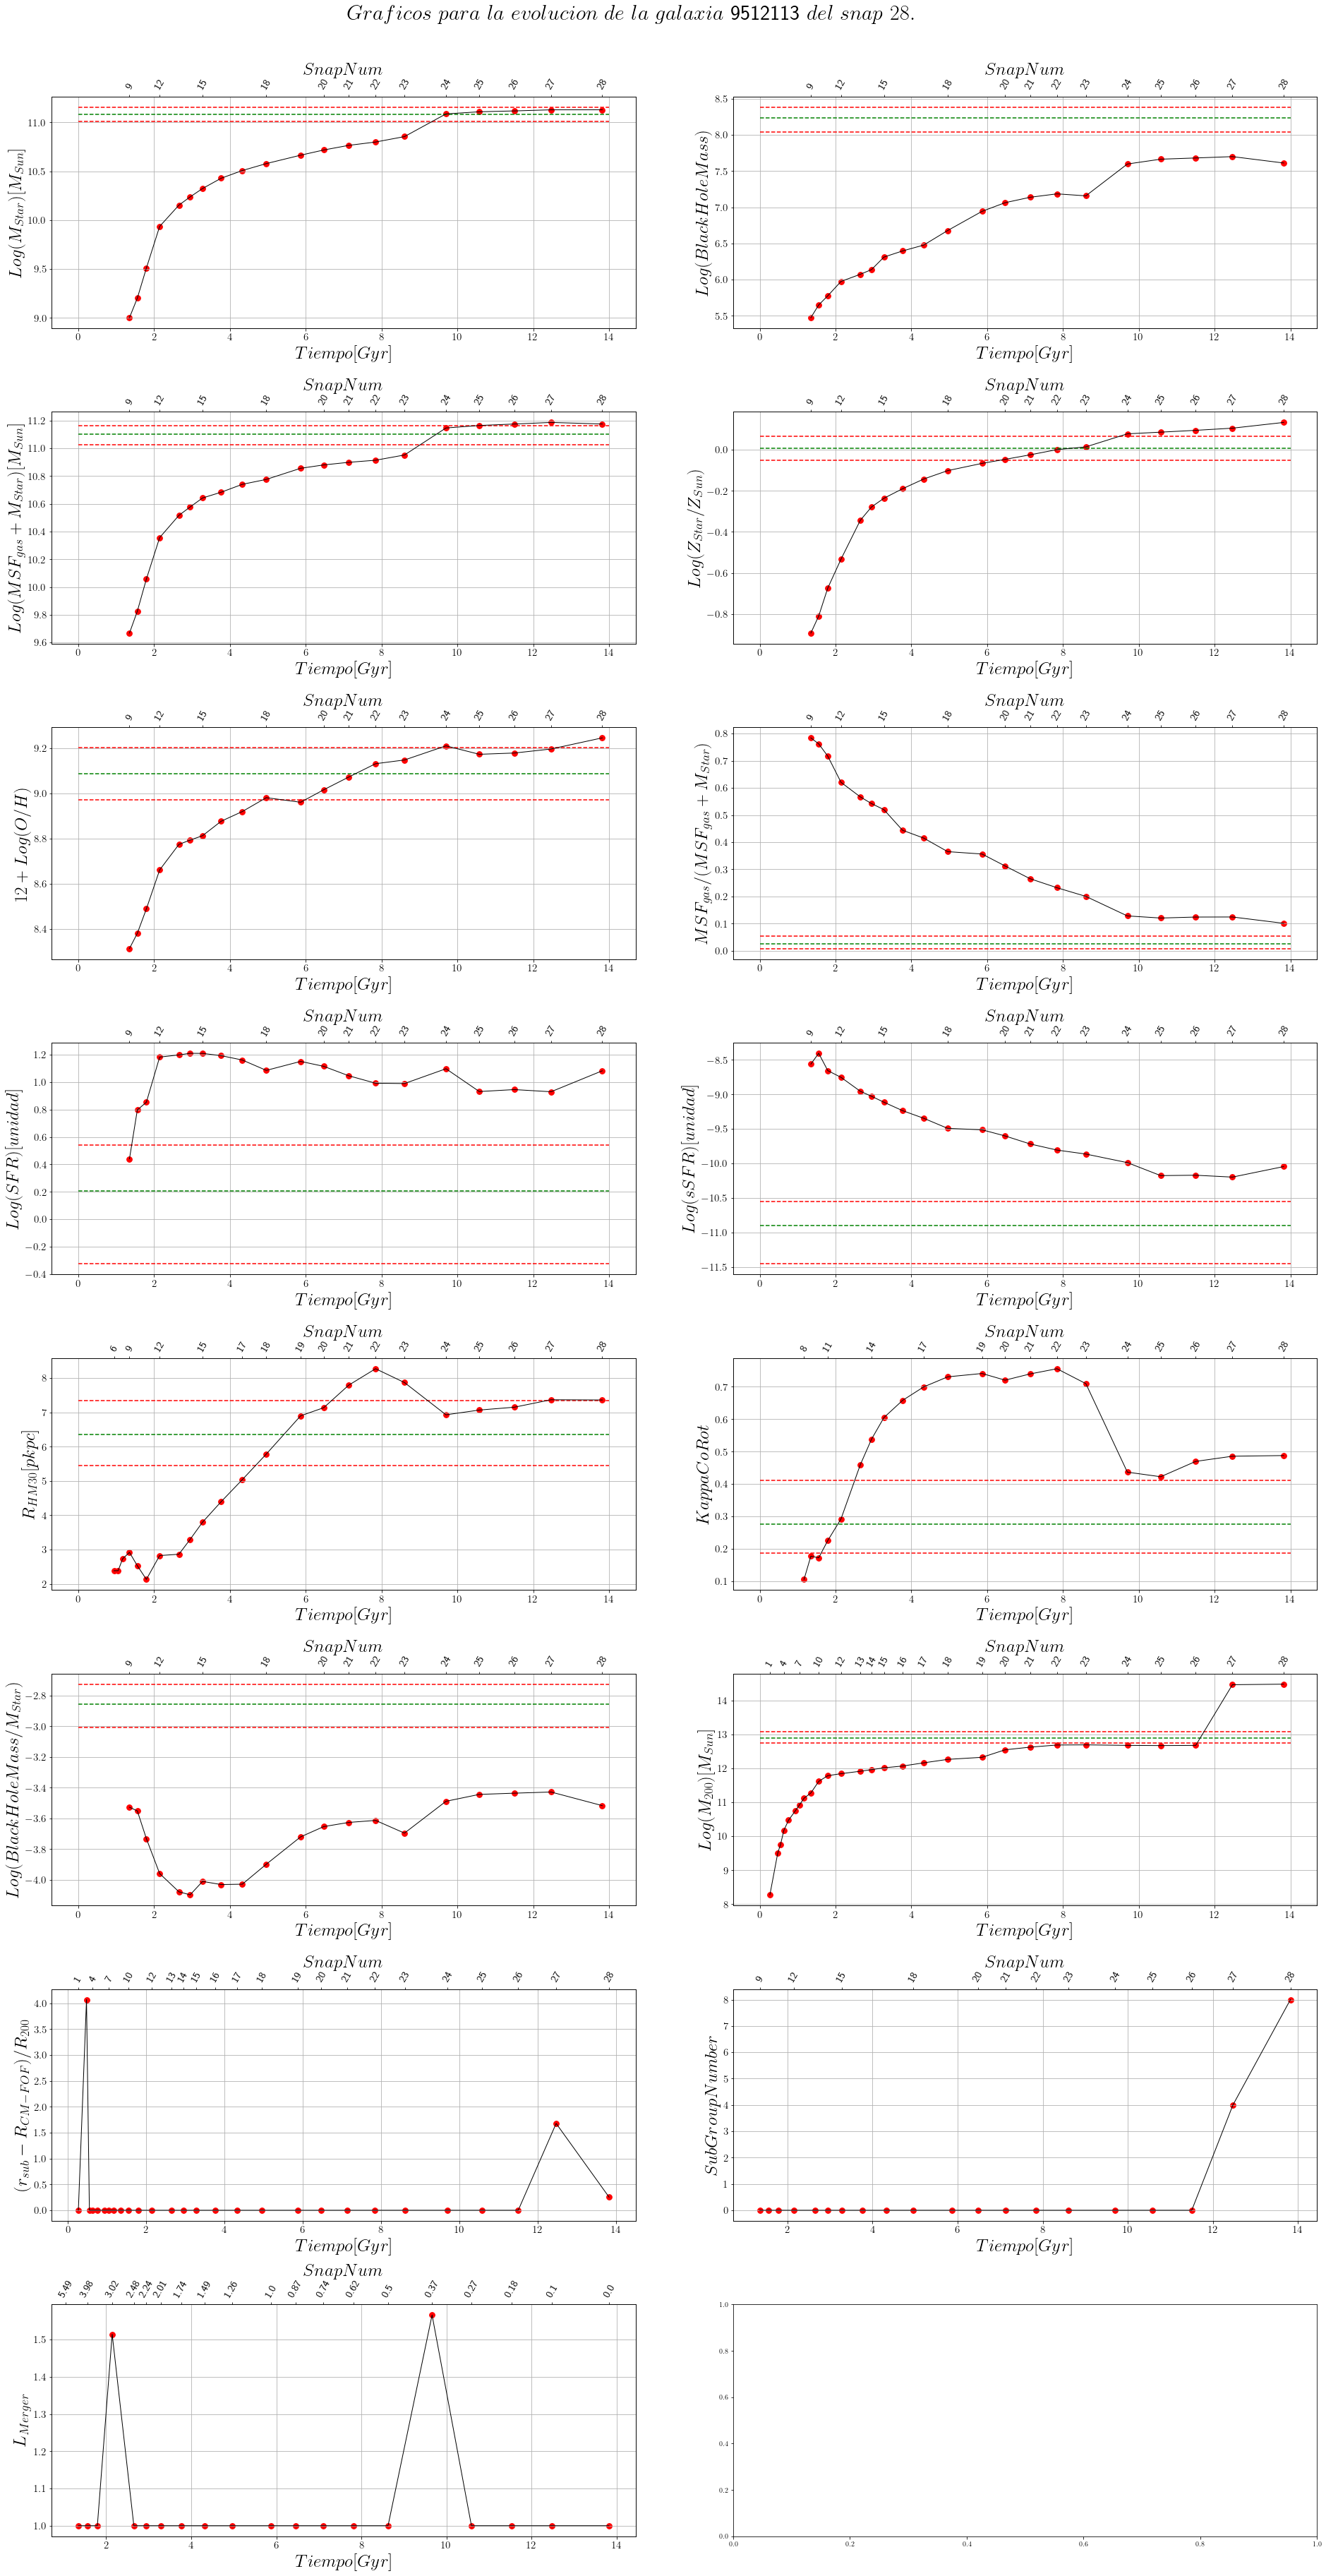

In [31]:
# Gráfico

fig,ax = plt.subplots(8,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=12.0)

fontdict ={'fontsize': 30}

fig.suptitle(r'$Graficos\ para\ la\ evolucion\ de\ la\ galaxia\ $'+str(a)+'$\ del\ snap\ 28.$', fontsize=30)

for i in np.arange(len(ylabels)):

#     xlim=(min(xvar[i]),max(xvar[i]))
#     ylim=(min(yvar[i]),max(yvar[i]))

    ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
    ax[i].set_ylabel(str(ylabels[i]),fontsize=25)

#     ax[i].set_xlim(min(xvar_main[i].values),max(xvar_main[i].values))
#     ax[i].set_xlim(xlim)
#     ax[i].set_ylim(ylim)

    ax[i].tick_params(axis='both', which='major', labelsize=15)
                
    plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)
    
# # -------------------------------------------------------------------------------------------    
    
    # Galaxias que se fusionan con las de la main branch
    plot_main_mergers = False
    if plot_main_mergers:
        for j in range(np.size(main_gal[i])):    
            xplot_merge=[]
            yplot_merge=[]
#             color_merge=np.array([[1,1,1,1]])  # Lo inicializo así para usar luego vstack
    
            mask=np.where((tree_desc[i]==main_gal[i].iloc[j]))[0]  # estas galaxias incluyen también
                                                                          # al progenitor principal.  
            # Con lo siguiente, se excluye al progenitor principal
            for k in mask:
                if tree_desc[i].iloc[k] not in main_gal[i]:
                    xplot_merge=np.append(xplot_merge,xvar_tree[i].iloc[k])
                    yplot_merge=np.append(yplot_merge,yvar_tree[i].iloc[k])
#                     color_merge=np.vstack((color_merge,color_plot[k]))
#             color_merge=np.delete(color_merge,(0),axis=0)
        
#             # Scatter plot of galaxies that merge with main branch
            ax[i].scatter(xplot_merge,yplot_merge,c='b',s=35,marker="v")#color_merge,s=30)
    
#             # Lines matching the galaxies with their descendant
            for l in range(len(xplot_merge)):
                ax[i].plot([xplot_merge[l],xvar_main[i].iloc[j]],[yplot_merge[l],yvar_main[i].iloc[j]], 'k--',lw=0.5)#,c=color_plot_main[i])

# -------------------------------------------------------------------------------------------        

# #     # scatter plot
      #Para el tree
#     ax[i].scatter(xvar_tree[i],yvar_tree[i],marker='o',s=2,c='0.3',label='Scatter plot')

    # Para la rama principal
    ax[i].plot(xvar_main[i],yvar_main[i],linestyle='-',c='k',lw=1)
    ax[i].scatter(xvar_main[i],yvar_main[i],marker='o',s=60,c='r',linestyle='-',label='Scatter plot')

# -------------------------------------------------------------------------------------------
    
#     Lineas horizontales
    ax[i].hlines(yvar_medians[i], 0, 14,colors = 'g',linestyles='dashed')
    ax[i].hlines(yvar_medians[i] - yvar_errors[i][0], 0, 14,colors = 'r',linestyles='dashed')
    ax[i].hlines(yvar_medians[i] + yvar_errors[i][1], 0, 14,colors = 'r',linestyles='dashed')

# -------------------------------------------------------------------------------------------
    
#   Label superior
    new_redshift=[]
    for j in np.arange(len(xvar_main_sup[i].values)):
        new_redshift.append(str(np.round(xvar_main_sup[i].values,2)[j]))
    
    ax2 = ax[i].twiny()
  
    #     Parte con mayor densidad de valores en redshift
    ax2.set_xticks(np.append(xvar_main[i].values[0:11][::3],xvar_main[i].values[11::]))
    ax2.set_xticklabels(np.append(new_redshift[0:11][::3],new_redshift[11::]),fontsize=15,rotation=60)

    ax2.set_xlabel(xlabels_sup[0],fontsize=25)
    ax2.set_xlim(ax[i].get_xlim())
    
    ax[i].grid()

# ax[0].set_title(r'$Galaxia\ '+str(a)+'\ (z=0)\ con\ \\textbf{mayor}\ lever\ of\ merger.$',fontdict=fontdict)
# ax[1].set_title(r'$Galaxia\ '+str(b)+'\ (z=0)\ con\ \\textbf{menor}\ leverl\ of\ merger.$',fontdict=fontdict)


# plt.savefig(path_lin_fig+'historial_mag_gal_'+str(a)+'.png')

plt.show()

## Track evolutivo

##### Vemos dónde ocurré el magor merger

In [32]:
for maxsnap in np.arange(1,29):
    if merger_a['Lm_snap'+str(maxsnap)].values[0] == merger_a.max(axis=1).values[0]:
        break
        
mask_maxsnap =(SUB_MAIN[0]['SnapNum']==maxsnap)

### MZR

In [33]:
maxsnap

24

In [165]:
from matplotlib import colors

# Variables to plot
xplot = np.log10(SUB_TREE[0]['Stars_Mass']).values
yplot = SUB_TREE[0]['SF_logOH'].values

# Labels of variables to plot
xlabel = r'$Log(M_{Stars})[M_{Sun}]$'
ylabel = r'$12+Log(O/H)$'

# Circulo sobre el magor merger

xcirc = np.log10(SUB_MAIN[0]['Stars_Mass'][mask_maxsnap]).values
ycirc = SUB_MAIN[0]['SF_logOH'][mask_maxsnap].values

circlemax = plt.Circle((xcirc, ycirc), 0.1, color='k',fill=False)

# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# Variable to colour markers and lines
color_var = SUB_TREE[0]['Redshift'].values
color_var_label = 'z'

# Define colors
cmap = plt.get_cmap('jet')
cmap.set_under('k')    # Color por debajo de mínimo

# Limits of variable used to color-code. Modify if necessary.
vmin = min(SUB_MAIN[0]['Redshift'].values)
vmax = max(SUB_MAIN[0]['Redshift'].values)
norm = colors.Normalize(vmin=vmin,vmax=vmax,clip=False)
color_plot = cmap(norm(color_var))

# Variables a graficar, solo de la main branch
xplot_main = xplot[mask_main_sub_a]
yplot_main = yplot[mask_main_sub_a]
color_plot_main = color_plot[mask_main_sub_a]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-165-ed43d3a1c4a8>:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_under('k')    # Color por debajo de mínimo


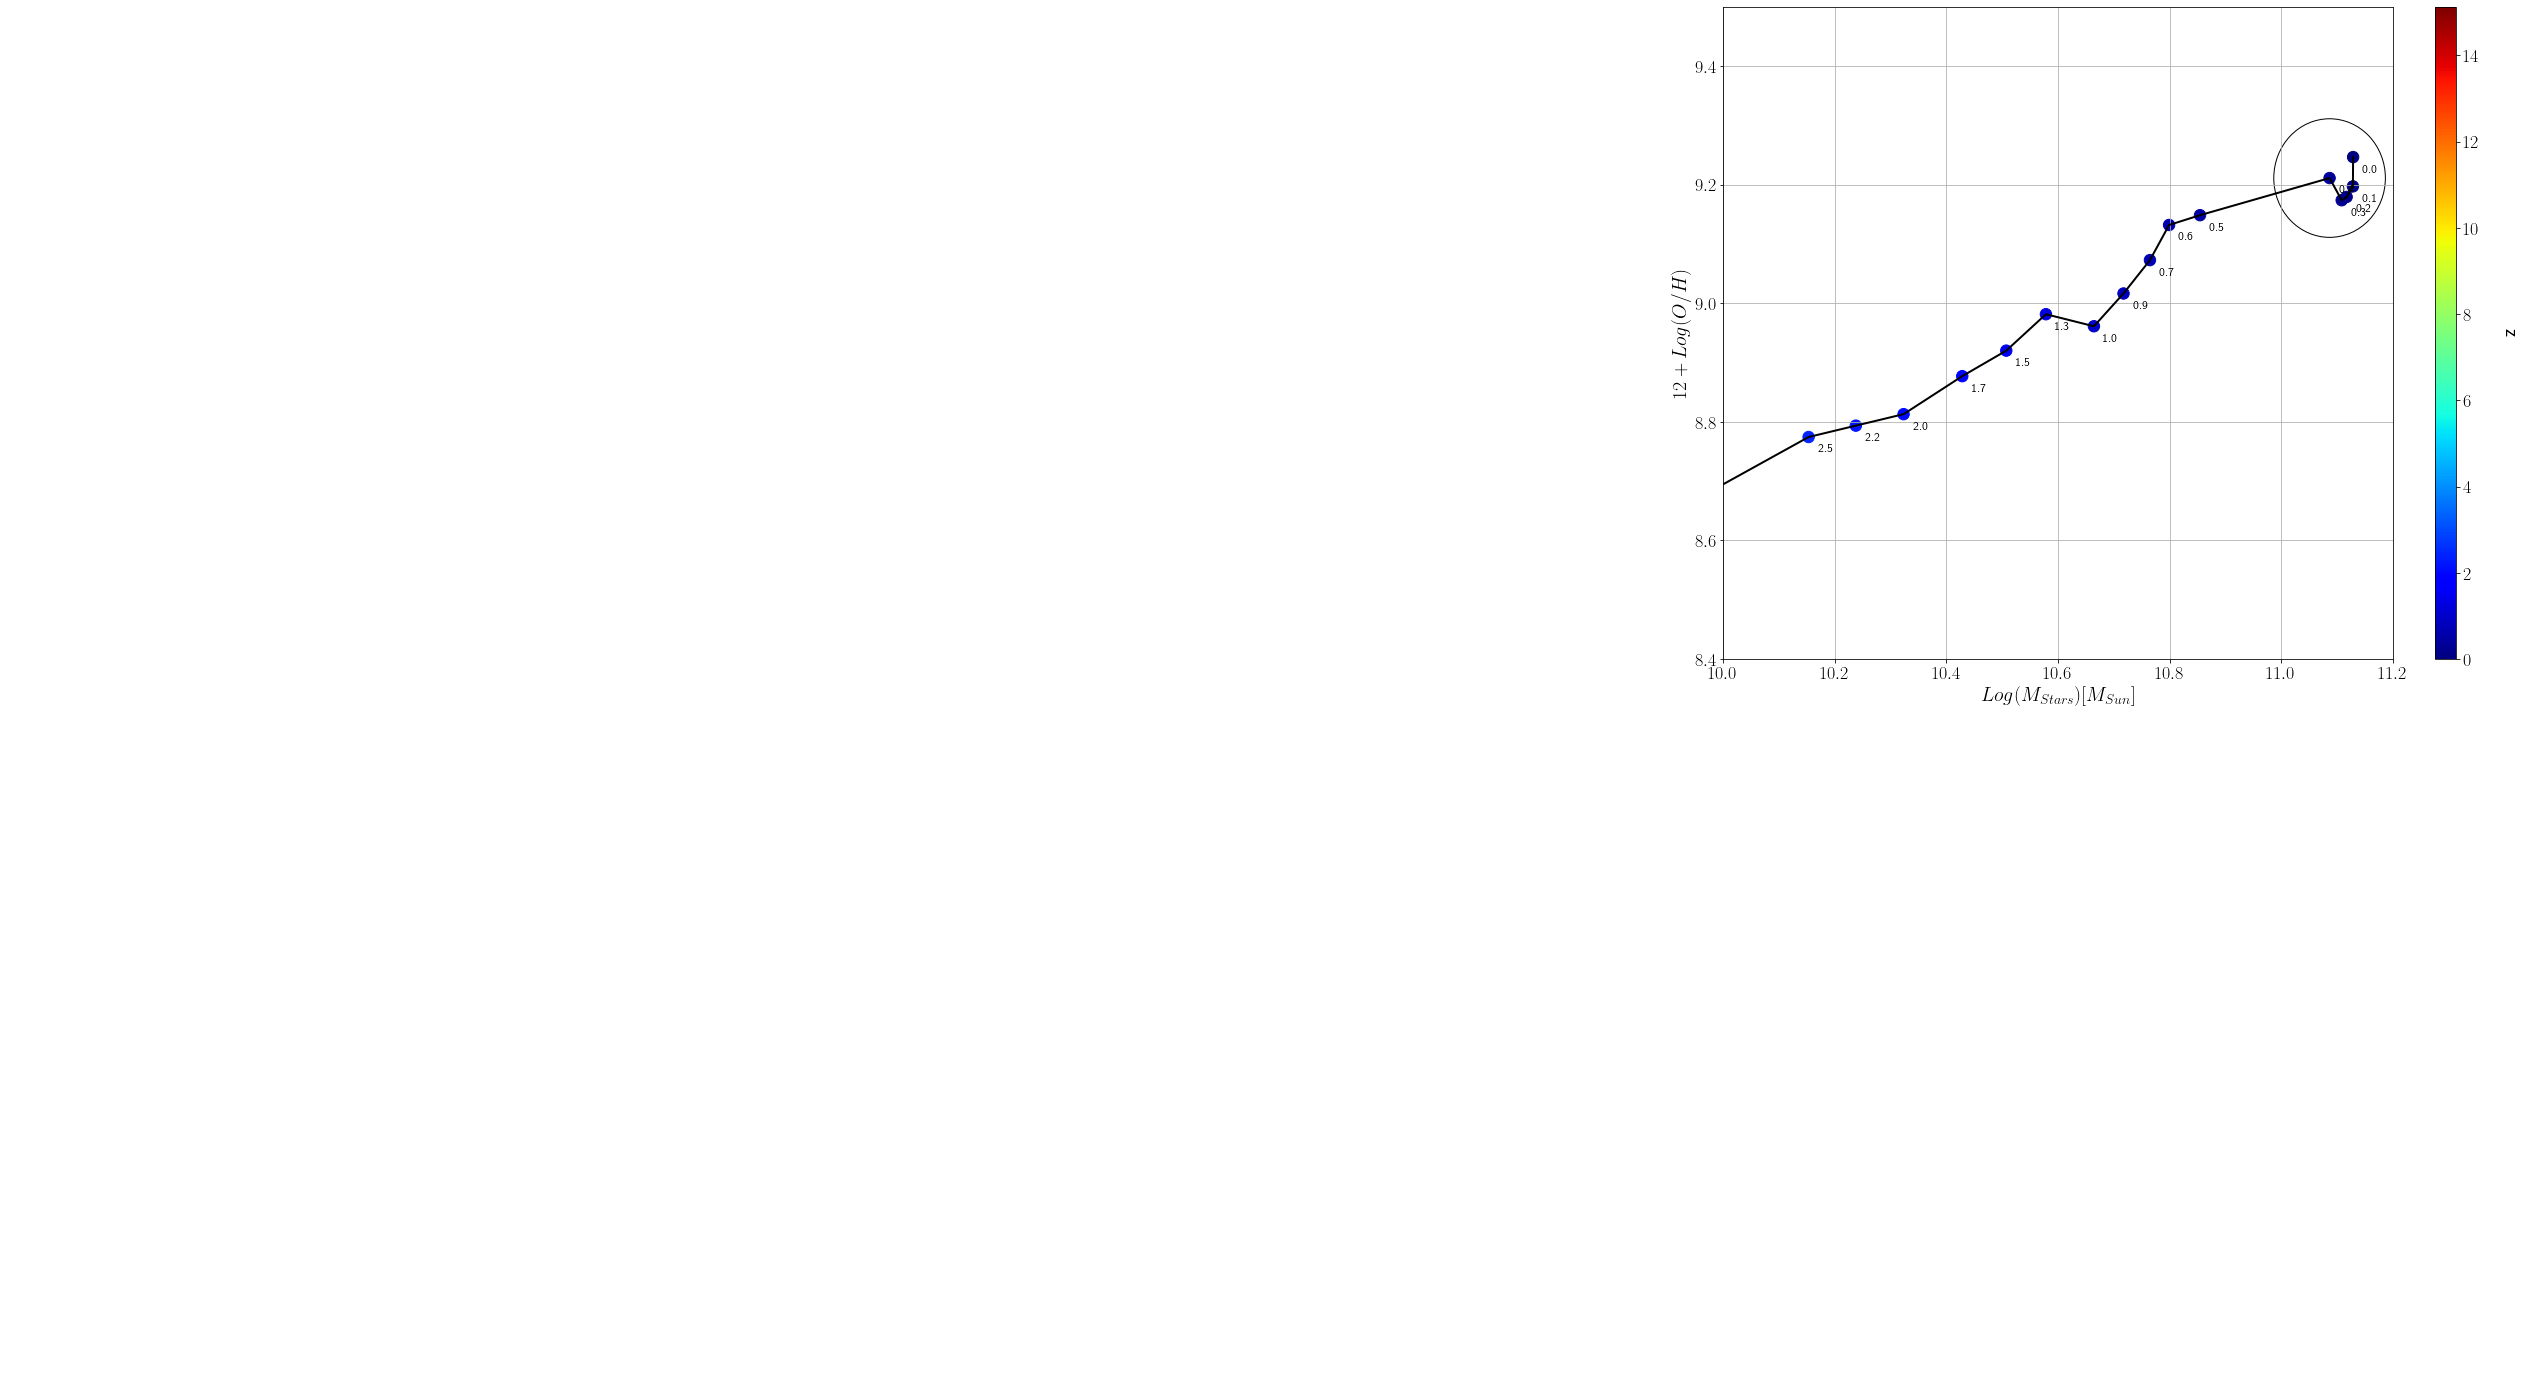

In [166]:
fig,ax=plt.subplots(figsize=(15,12))
    
# Plot main branch
ax.plot(xplot_main,yplot_main,c='k',lw=2)
sc_main=ax.scatter(xplot_main,yplot_main,c=color_plot_main,s=130)

# Vertical color bar with reference to redshifts
sc_main.set_cmap('jet')
sc_main.set_norm(norm)
cbar=fig.colorbar(sc_main, ax=ax, orientation='vertical',shrink=1,pad=0.05,aspect=30)
cbar.set_label(color_var_label,fontsize=20,rotation=270,labelpad=40)
cbar.ax.tick_params(axis='both', which='major', labelsize=18,top=True,bottom=False,
                    labeltop=True,labelbottom=False)

# -------------------------------------------------------------------------------------------

# Galaxias que se fusionan con las de la main branch
plot_main_mergers=False
if plot_main_mergers:
    for i in range(np.size(SUB_MAIN[0]['GalaxyID'])):    
        xplot_merge=[]
        yplot_merge=[]
        color_merge=np.array([[1,1,1,1]])  # Lo inicializo así para usar luego vstack
    
        mask=np.where((SUB_TREE[0]['DescendantID']==SUB_MAIN[0]['GalaxyID'][i]))[0]  # estas galaxias incluyen también
                                                                          # al progenitor principal.  
        # Con lo siguiente, se excluye al progenitor principal
        for k in mask:
            if SUB_TREE[0]['GalaxyID'][k] not in SUB_MAIN[0]['GalaxyID']:
                xplot_merge=np.append(xplot_merge,xplot[k])
                yplot_merge=np.append(yplot_merge,yplot[k])
                color_merge=np.vstack((color_merge,color_plot[k]))
        color_merge=np.delete(color_merge,(0),axis=0)
        
        # Scatter plot of galaxies that merge with main branch
        ax.scatter(xplot_merge,yplot_merge,c=color_merge,s=30)
    
        # Lines matching the galaxies with their descendant
        for j in range(len(xplot_merge)):
            ax.plot([xplot_merge[j],xplot_main[i]],[yplot_merge[j],yplot_main[i]],c=color_plot_main[i])

# -------------------------------------------------------------------------------------------  
# Ploteo de de las de las medianas para diferentes redshift, hay que descargar datos.

plot_medianas=False
if plot_medianas:

    snap_list=[28,19,15,12]
    redshift_list=[0,1,2,3]

    color=['k','b','g','r']    
    line=['-','--','-.',':']  

    # Parmetros para determinar la curva mediana y errores
    nbins=15        # Numero de bins en variable x a usar para dividir la muestra
    perc_low=25.        # Percentil a usar como cota inferior de error
    perc_high=75.       # Percentil a usar como cota superior de error
    min_count=10         # Mínima cantidad de elementos para considerar en un bin


    for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):
    
        tables=['Subhalo']
        aliases=['sub']
        columns=[['GalaxyID','SnapNum','Stars_Mass','SF_Hydrogen','SF_Oxygen','SF_Mass']]
    
        conditions=[['SnapNum='+str(snap),'Stars_Mass>=1e6','SF_Hydrogen>0','SF_Oxygen>0','SF_Mass>0']]
    
        # Armo la sentencia SELECT 
        select=''
        for alias,col in zip(aliases,columns):
            select=select+(','.join([alias+'.'+name for name in col]))+','
        select=select[:-1]   # Esto es para borrar una última coma 'molesta'

        # --------------------------------------------------------------------------------

        # Armo la sentencia FROM
        from_table=''
        for tab,alias in zip(tables,aliases):
            from_table=from_table+simu+'_'+tab+' as '+alias+','
        from_table=from_table[:-1]   # Esto es para borrar una última coma 'molesta'

         # --------------------------------------------------------------------------------

         # Armo la sentencia WHERE
         # Condiciones para unir tablas (igualdad de GalaxyIDs)
        join_conditions=''
        # Lo sigueinte solo se ejecutará si hay más de una tabla
        if len(tables)>1:
            for k in range(len(aliases)-1):
                join_conditions=(join_conditions+
                                 aliases[k]+'.GalaxyID='+aliases[k+1]+'.GalaxyID'+' and ')
            join_conditions=join_conditions[:-5]

        where=''    
        for alias,condit in zip(aliases,conditions):
            if len(condit)>0:
                where=where+(' and '.join(alias+'.'+cond for cond in condit))+ ' and '
                if len(aliases)==1:
                    where=where[:-4] # Esto es para borrar un 'and' molesto
        where=where+join_conditions
    
        # Conectarse a la base de datos
        con = sql.connect(usr,password=pwd)

        # Query en SQL
        query = 'SELECT '+select+' FROM '+from_table+' WHERE '+where

        # Execute query 
        exquery = sql.execute_query(con, query)

        # List of column names of downloaded data
        colnames=(exquery.view(np.recarray).dtype.names)

        # Dictionary of data
        mytable={}
        for name in colnames:
            mytable[name]=exquery[name]
    
    
        TEMP = pd.DataFrame(mytable)
    
    
        SF_O  = TEMP['SF_Oxygen']
        SF_H  = TEMP['SF_Hydrogen']
        SF_M  = TEMP['SF_Mass']
        M_Star= TEMP['Stars_Mass']

        M_O_SF = SF_O*SF_M
        M_H_SF = SF_H*SF_M

        xvar   = np.log10(M_Star)
        yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))
    
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

        ax.plot(xmedian,ymedian,marker='o',ms=0.5,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
        
    
    #     ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,
    #                         linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)

# -------------------------------------------------------------------------------------------

# Tune up the plot
ax.grid()

xmin, xmax = 10,11.2
ax.set_xlim(xmin,xmax)

ymin, ymax= 8.4,9.5
ax.set_ylim(ymin,ymax)

# Ponemos una etiqueta a cada plot 

long = np.arange(len(xplot_main))
for i,j,k in zip(xplot_main,yplot_main,long):
    ax.annotate(str(round(SUB_MAIN[0]['Redshift'].values[k],1)),  xy=(i+0.03, j-0.02), color='black', fontsize="large", weight='heavy',horizontalalignment='center',verticalalignment='center')


# Agrogo el círculo en el magor merger
ax.add_patch(circlemax)

ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)

# plt.axis('scaled')

ax.tick_params(which='major',axis='both',labelsize=18)

In [ ]:
str(round(SUB_MAIN[0]['Redshift'].values[1],2))

In [56]:
round(SUB_MAIN[0]['Redshift'].values[1],2)

9.99

## Para F_gas

In [67]:
from matplotlib import colors

# Variables to plot
xplot = (SUB_TREE[0]['SF_Mass']/(SUB_TREE[0]['Stars_Mass']+SUB_TREE[0]['SF_Mass'])).values
yplot = SUB_TREE[0]['SF_logOH'].values

# Circulo sobre el magor merger

xcirc = (SUB_MAIN[0]['SF_Mass'][mask_maxsnap]/(SUB_MAIN[0]['Stars_Mass'][mask_maxsnap]+SUB_MAIN[0]['SF_Mass'][mask_maxsnap])).values
ycirc = SUB_MAIN[0]['SF_logOH'][mask_maxsnap].values

circlemax = plt.Circle((xcirc, ycirc), 0.1, color='k',fill=False)

# Labels of variables to plot
xlabel = r'$F_{gas}$'
ylabel = r'$12+Log(O/H)$'

# -----------------------------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------------------
# Variable to colour markers and lines
color_var = SUB_TREE[0]['Redshift'].values
color_var_label = 'z'

# Define colors
cmap = plt.get_cmap('jet')
cmap.set_under('k')    # Color por debajo de mínimo

# Limits of variable used to color-code. Modify if necessary.
vmin = min(SUB_MAIN[0]['Redshift'].values)
vmax = max(SUB_MAIN[0]['Redshift'].values)
norm = colors.Normalize(vmin=vmin,vmax=vmax,clip=False)
color_plot = cmap(norm(color_var))

# Variables a graficar, solo de la main branch
xplot_main = xplot[mask_main_sub_a]
yplot_main = yplot[mask_main_sub_a]
color_plot_main = color_plot[mask_main_sub_a]

<ipython-input-67-16387a3af5b1>:28: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_under('k')    # Color por debajo de mínimo


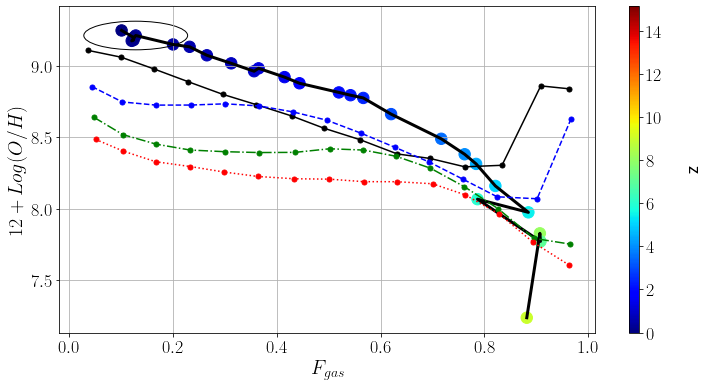

In [68]:
fig,ax=plt.subplots(figsize=(12,6))
    
# Plot main branch
ax.plot(xplot_main,yplot_main,c='k',lw=3)
sc_main=ax.scatter(xplot_main,yplot_main,c=color_plot_main,s=130)

# Vertical color bar with reference to redshifts
sc_main.set_cmap('jet')
sc_main.set_norm(norm)
cbar=fig.colorbar(sc_main, ax=ax, orientation='vertical',shrink=1,pad=0.05,aspect=30)
cbar.set_label(color_var_label,fontsize=20,rotation=270,labelpad=40)
cbar.ax.tick_params(axis='both', which='major', labelsize=18,top=True,bottom=False,
                    labeltop=True,labelbottom=False)

# -------------------------------------------------------------------------------------------

# Galaxias que se fusionan con las de la main branch
plot_main_mergers=False
if plot_main_mergers:
    for i in range(np.size(SUB_MAIN[0]['GalaxyID'])):    
        xplot_merge=[]
        yplot_merge=[]
        color_merge=np.array([[1,1,1,1]])  # Lo inicializo así para usar luego vstack
    
        mask=np.where((SUB_TREE[0]['DescendantID']==SUB_MAIN[0]['GalaxyID'][i]))[0]  # estas galaxias incluyen también
                                                                          # al progenitor principal.  
        # Con lo siguiente, se excluye al progenitor principal
        for k in mask:
            if SUB_TREE[0]['GalaxyID'][k] not in SUB_MAIN[0]['GalaxyID']:
                xplot_merge=np.append(xplot_merge,xplot[k])
                yplot_merge=np.append(yplot_merge,yplot[k])
                color_merge=np.vstack((color_merge,color_plot[k]))
        color_merge=np.delete(color_merge,(0),axis=0)
        
        # Scatter plot of galaxies that merge with main branch
        ax.scatter(xplot_merge,yplot_merge,c=color_merge,s=30)
    
        # Lines matching the galaxies with their descendant
        for j in range(len(xplot_merge)):
            ax.plot([xplot_merge[j],xplot_main[i]],[yplot_merge[j],yplot_main[i]],c=color_plot_main[i])

# -------------------------------------------------------------------------------------------     

# Ploteo de de las de las medianas para diferentes redshift, hay que descargar datos.

plot_medianas=True
if plot_medianas:
    snap_list=[28,19,15,12]
    redshift_list=[0,1,2,3]

    color=['k','b','g','r']    
    line=['-','--','-.',':']  

    # Parmetros para determinar la curva mediana y errores
    nbins=15        # Numero de bins en variable x a usar para dividir la muestra
    perc_low=25.        # Percentil a usar como cota inferior de error
    perc_high=75.       # Percentil a usar como cota superior de error
    min_count=10         # Mínima cantidad de elementos para considerar en un bin


    for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):
    
        tables=['Subhalo']
        aliases=['sub']
        columns=[['GalaxyID','SnapNum','Stars_Mass','SF_Hydrogen','SF_Oxygen','SF_Mass']]
    
        conditions=[['SnapNum='+str(snap),'Stars_Mass>=1e6','SF_Hydrogen>0','SF_Oxygen>0','SF_Mass>0']]
    
        # Armo la sentencia SELECT 
        select=''
        for alias,col in zip(aliases,columns):
            select=select+(','.join([alias+'.'+name for name in col]))+','
        select=select[:-1]   # Esto es para borrar una última coma 'molesta'

        # --------------------------------------------------------------------------------

        # Armo la sentencia FROM
        from_table=''
        for tab,alias in zip(tables,aliases):
            from_table=from_table+simu+'_'+tab+' as '+alias+','
        from_table=from_table[:-1]   # Esto es para borrar una última coma 'molesta'

        # --------------------------------------------------------------------------------

        # Armo la sentencia WHERE
        # Condiciones para unir tablas (igualdad de GalaxyIDs)
        join_conditions=''
        # Lo sigueinte solo se ejecutará si hay más de una tabla
        if len(tables)>1:
            for k in range(len(aliases)-1):
                join_conditions=(join_conditions+
                                 aliases[k]+'.GalaxyID='+aliases[k+1]+'.GalaxyID'+' and ')
            join_conditions=join_conditions[:-5]

        where=''    
        for alias,condit in zip(aliases,conditions):
            if len(condit)>0:
                where=where+(' and '.join(alias+'.'+cond for cond in condit))+ ' and '
                if len(aliases)==1:
                    where=where[:-4] # Esto es para borrar un 'and' molesto
        where=where+join_conditions
    
        # Conectarse a la base de datos
        con = sql.connect(usr,password=pwd)

        # Query en SQL
        query = 'SELECT '+select+' FROM '+from_table+' WHERE '+where

        # Execute query 
        exquery = sql.execute_query(con, query)

        # List of column names of downloaded data
        colnames=(exquery.view(np.recarray).dtype.names)

        # Dictionary of data
        mytable={}
        for name in colnames:
            mytable[name]=exquery[name]
    
    
        TEMP = pd.DataFrame(mytable)
    
    
        SF_O  = TEMP['SF_Oxygen']
        SF_H  = TEMP['SF_Hydrogen']
        SF_M  = TEMP['SF_Mass']
        M_Star= TEMP['Stars_Mass']

        M_O_SF = SF_O*SF_M
        M_H_SF = SF_H*SF_M

        xvar   = SF_M/(M_Star+SF_M)
        yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))
    
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

        ax.plot(xmedian,ymedian,marker='o',ms=5,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
#     ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,
#                         linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)

# -------------------------------------------------------------------------------------------


        
# Tune up the plot
ax.grid()

xmin, xmax = -0.3,8.3
#ax.set_xlim(xmax,xmin)

ymin, ymax= 6.4,10.6
#ax.set_ylim(ymin,ymax)

# Agrogo el círculo en el magor merger
ax.add_patch(circlemax)

ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)

# plt.axis('scaled')

ax.tick_params(which='major',axis='both',labelsize=18)